In [1]:
# import libraries
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# loading the dataset
df = pd.read_csv('/workspaces/codespaces-jupyter/FoodBalanceSheets_E_Africa_NOFLAG.csv', encoding='latin-1', index_col=False)
df.head()

Area Code     Area  Item Code         Item  Element Code  \
0          4  Algeria       2501   Population           511   
1          4  Algeria       2501   Population          5301   
2          4  Algeria       2901  Grand Total           664   
3          4  Algeria       2901  Grand Total           674   
4          4  Algeria       2901  Grand Total           684   

                                  Element             Unit     Y2014  \
0           Total Population - Both sexes     1000 persons  38924.00   
1                Domestic supply quantity      1000 tonnes      0.00   
2           Food supply (kcal/capita/day)  kcal/capita/day   3377.00   
3  Protein supply quantity (g/capita/day)     g/capita/day     94.90   
4      Fat supply quantity (g/capita/day)     g/capita/day     80.06   

      Y2015     Y2016     Y2017     Y2018  
0  39728.00  40551.00  41389.00  42228.00  
1      0.00      0.00      0.00      0.00  
2   3379.00   3372.00   3341.00   3322.00  
3     94.35     94.72     92.82     91.83  
4     79.36     77.40     80.19     77.28

In [3]:
# checking the shape of the dataset
df.shape

(60943, 12)

In [4]:
# checking the columns of the dataset
df.columns

Index(['Area Code', 'Area', 'Item Code', 'Item', 'Element Code', 'Element',
       'Unit', 'Y2014', 'Y2015', 'Y2016', 'Y2017', 'Y2018'],
      dtype='object')

In [5]:
# checking the datatypes
df.dtypes


Area Code         int64
Area             object
Item Code         int64
Item             object
Element Code      int64
Element          object
Unit             object
Y2014           float64
Y2015           float64
Y2016           float64
Y2017           float64
Y2018           float64
dtype: object

In [6]:
# descriptive statistics
df.describe()

Area Code     Item Code  Element Code          Y2014          Y2015  \
count  60943.000000  60943.000000  60943.000000   59354.000000   59395.000000   
mean     134.265576   2687.176706   3814.856456     134.196282     135.235966   
std       72.605709    146.055739   2212.007033    1567.663696    1603.403984   
min        4.000000   2501.000000    511.000000   -1796.000000   -3161.000000   
25%       74.000000   2562.000000    684.000000       0.000000       0.000000   
50%      136.000000   2630.000000   5142.000000       0.090000       0.080000   
75%      195.000000   2775.000000   5511.000000       8.340000       8.460000   
max      276.000000   2961.000000   5911.000000  176405.000000  181137.000000   

               Y2016          Y2017          Y2018  
count   59408.000000   59437.000000   59507.000000  
mean      136.555222     140.917765     143.758381  
std      1640.007194    1671.862359    1710.782658  
min     -3225.000000   -1582.000000   -3396.000000  
25%         0.000000       0.000000       0.000000  
50%         0.080000       0.100000       0.070000  
75%         8.430000       9.000000       9.000000  
max    185960.000000  190873.000000  195875.000000

In [7]:
# dropping the unnecessary columns
df.drop(['Area Code', 'Item Code', 'Element Code', 'Unit'], axis=1, inplace=True)
df.head()

Area         Item                                 Element     Y2014  \
0  Algeria   Population           Total Population - Both sexes  38924.00   
1  Algeria   Population                Domestic supply quantity      0.00   
2  Algeria  Grand Total           Food supply (kcal/capita/day)   3377.00   
3  Algeria  Grand Total  Protein supply quantity (g/capita/day)     94.90   
4  Algeria  Grand Total      Fat supply quantity (g/capita/day)     80.06   

      Y2015     Y2016     Y2017     Y2018  
0  39728.00  40551.00  41389.00  42228.00  
1      0.00      0.00      0.00      0.00  
2   3379.00   3372.00   3341.00   3322.00  
3     94.35     94.72     92.82     91.83  
4     79.36     77.40     80.19     77.28

In [8]:
# renaming the columns
df.rename(columns={'Area': 'Country', 'Item': 'Food', 'Element': 'Food Status'}, inplace=True)

# checking the unique values
df['Country'].unique()


array(['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso',
       'Cabo Verde', 'Cameroon', 'Central African Republic', 'Chad',
       'Comoros', 'Congo', "Côte d'Ivoire", 'Djibouti', 'Egypt',
       'Eswatini', 'Ethiopia', 'Ethiopia PDR', 'Gabon', 'Gambia', 'Ghana',
       'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia',
       'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius',
       'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda',
       'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone',
       'South Africa', 'Sudan', 'Sudan (former)', 'Togo', 'Tunisia',
       'Uganda', 'United Republic of Tanzania', 'Zambia', 'Zimbabwe'],
      dtype=object)

In [9]:
# checking the columns
df.columns

Index(['Country', 'Food', 'Food Status', 'Y2014', 'Y2015', 'Y2016', 'Y2017',
       'Y2018'],
      dtype='object')

In [10]:
# filling all the null values in the dataset with median
df.fillna(df.median(), inplace=True)

/tmp/ipykernel_13262/1786051273.py:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.median(), inplace=True)


In [11]:
#  checking the null values
df.isnull().sum()

Country        0
Food           0
Food Status    0
Y2014          0
Y2015          0
Y2016          0
Y2017          0
Y2018          0
dtype: int64

# Data visualization

In [12]:
# checking the correlation
df.corr()

/tmp/ipykernel_13262/3362587831.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


Y2014     Y2015     Y2016     Y2017     Y2018
Y2014  1.000000  0.994649  0.996082  0.995231  0.994873
Y2015  0.994649  1.000000  0.995740  0.988051  0.988212
Y2016  0.996082  0.995740  1.000000  0.992786  0.992758
Y2017  0.995231  0.988051  0.992786  1.000000  0.998104
Y2018  0.994873  0.988212  0.992758  0.998104  1.000000

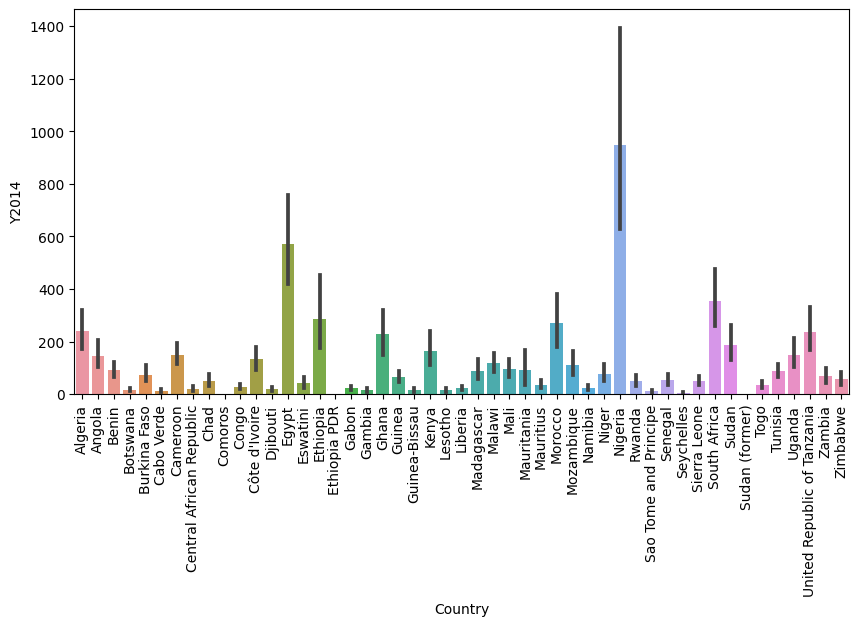

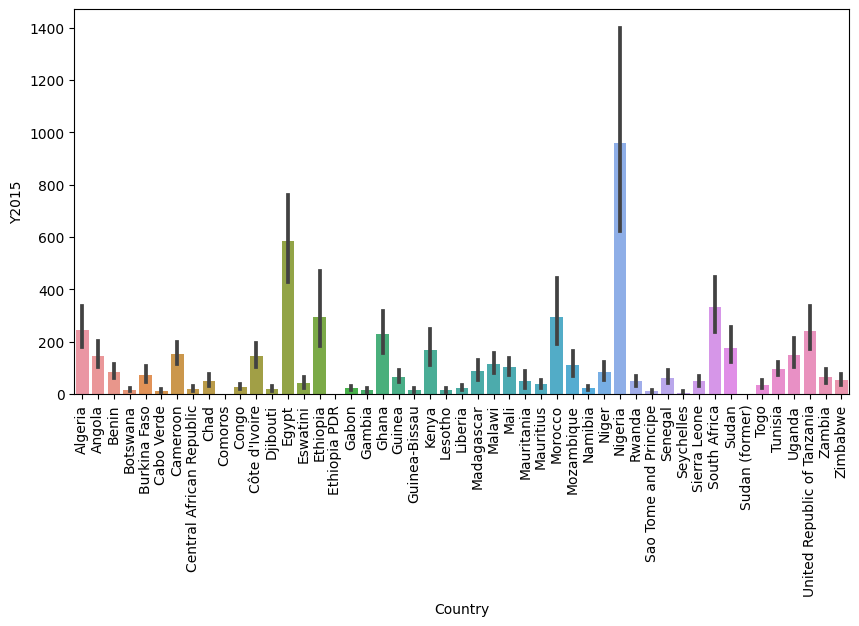

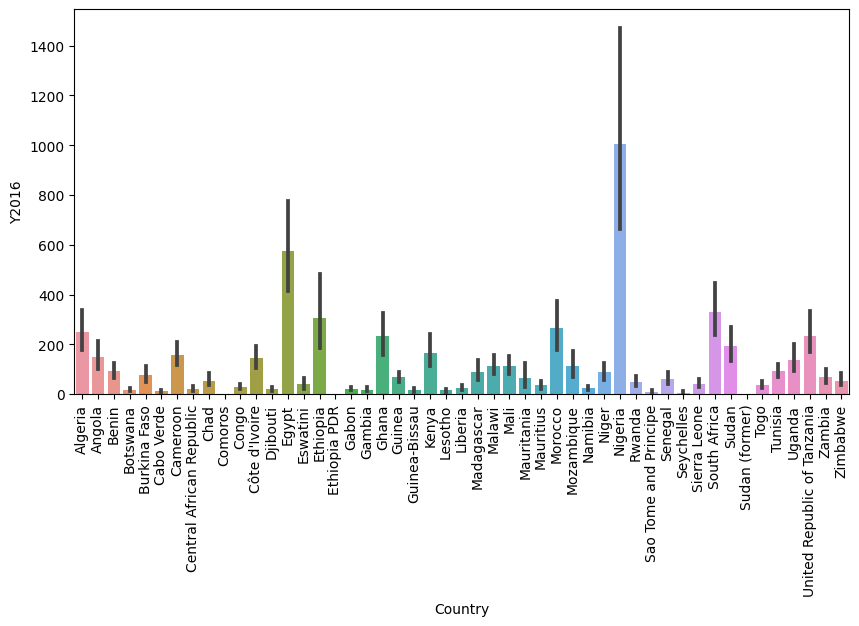

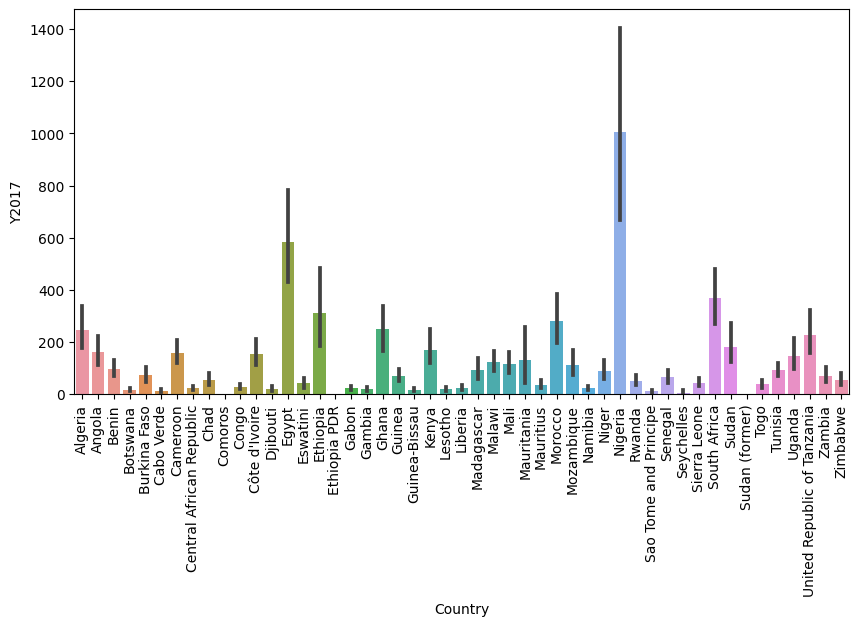

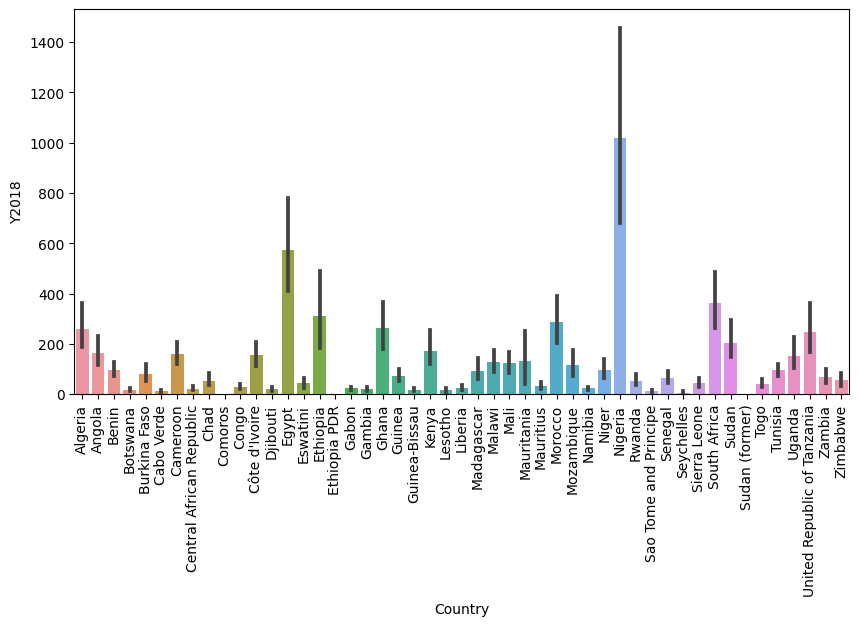

In [13]:
# loop all bar plots Y2014	Y2015	Y2016	Y2017	Y2018' together as one code
for i in ['Y2014', 'Y2015', 'Y2016', 'Y2017', 'Y2018']:
    plt.figure(figsize=(10, 5))
    sns.barplot(x='Country', y=i, data=df)
    plt.xticks(rotation=90)
    plt.show()




In [14]:
df.columns

Index(['Country', 'Food', 'Food Status', 'Y2014', 'Y2015', 'Y2016', 'Y2017',
       'Y2018'],
      dtype='object')

In [15]:
# data visualization that shows the relationship between the food status and the food
first = df.groupby('Food Status')['Food'].count().reset_index()
first.head()


Food Status  Food
0            Domestic supply quantity  5295
1                     Export Quantity  4403
2  Fat supply quantity (g/capita/day)  5023
3                                Feed  1319
4                                Food  4941

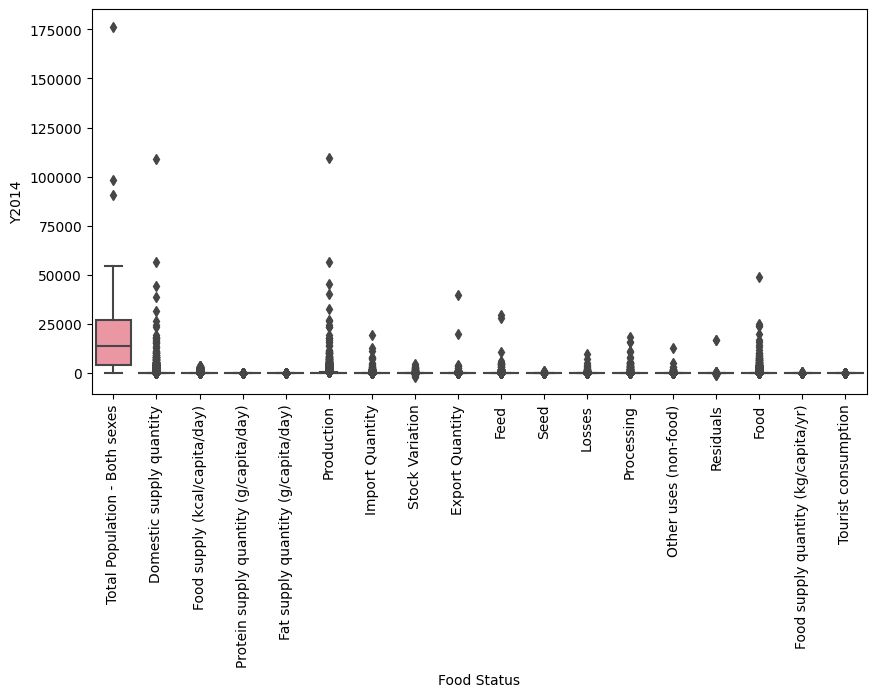

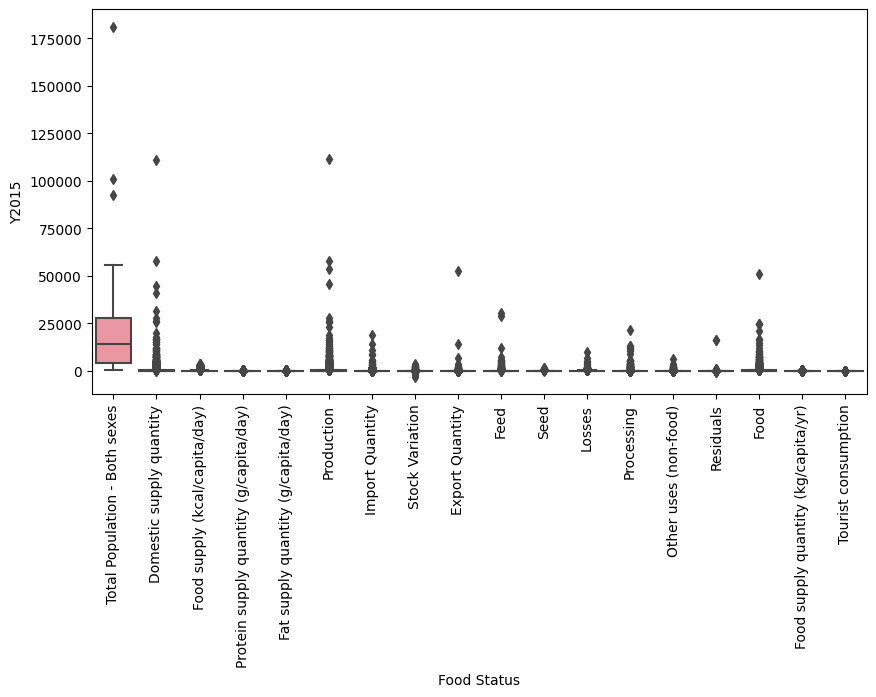

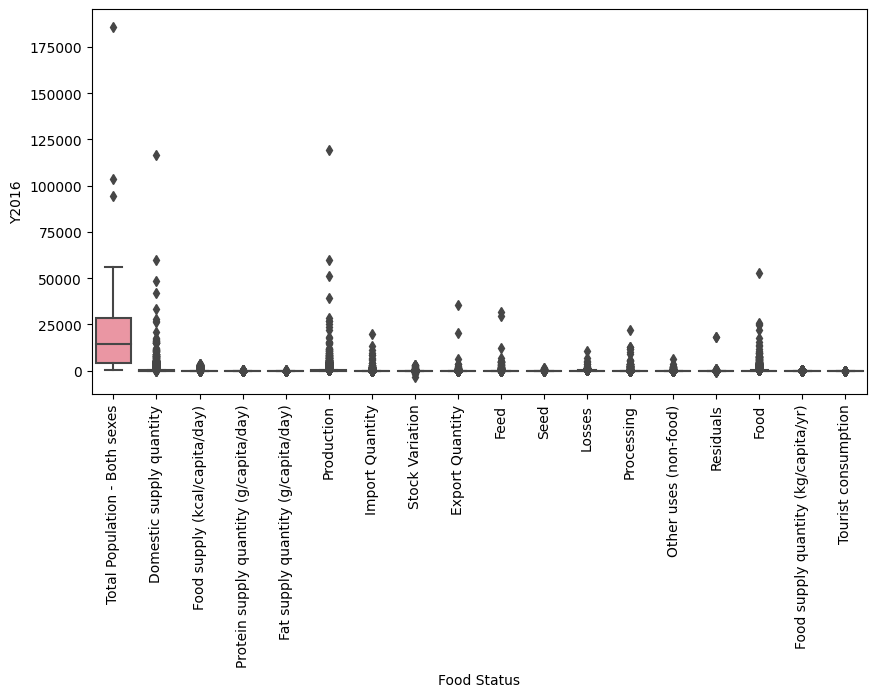

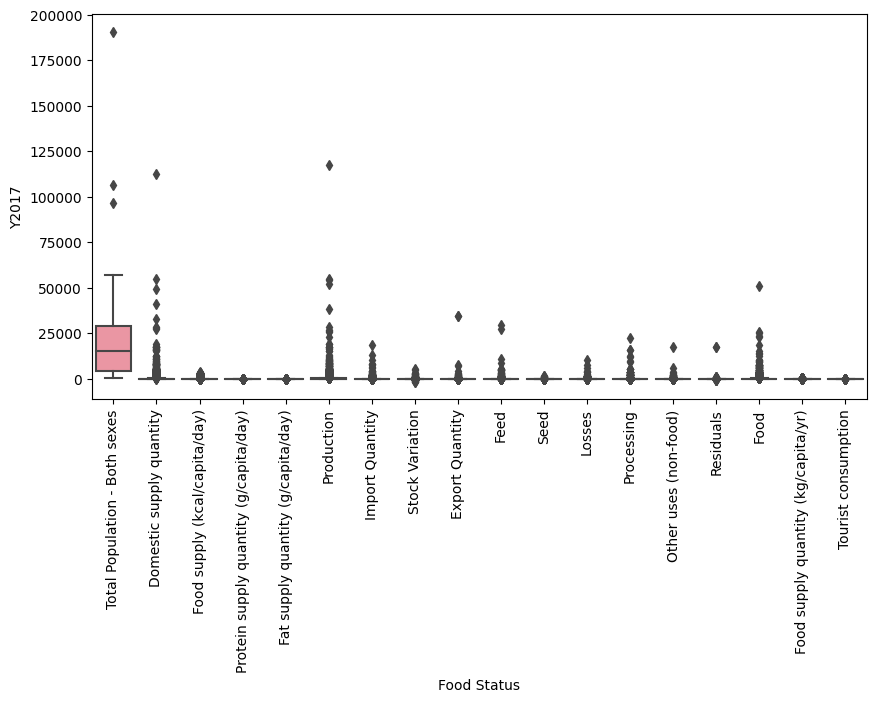

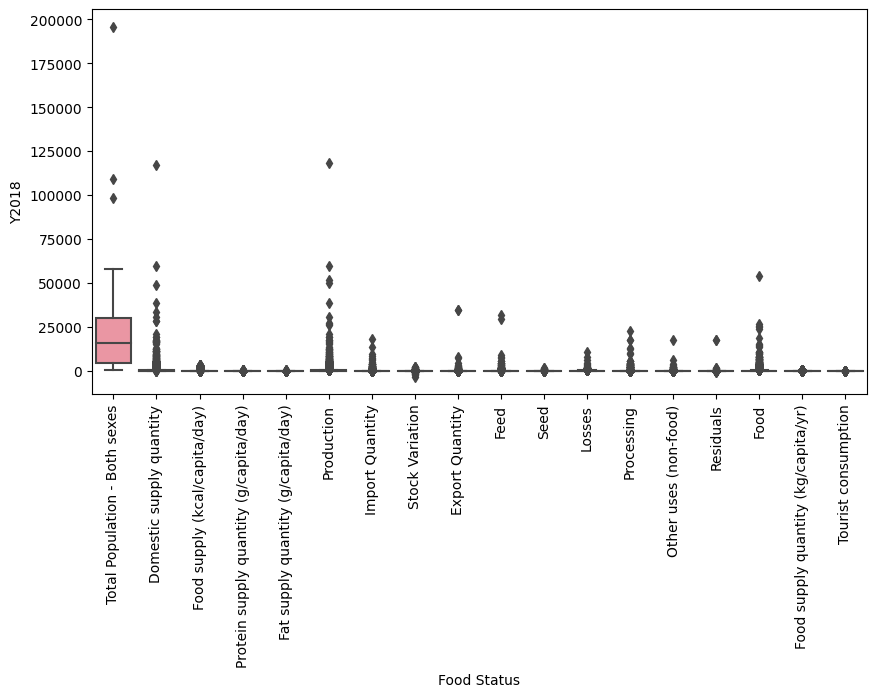

In [16]:
# loop all box plots Y2014	Y2015	Y2016	Y2017	Y2018' together as one code
for i in ['Y2014', 'Y2015', 'Y2016', 'Y2017', 'Y2018']:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='Food Status', y=i, data=df)
    plt.xticks(rotation=90)
    plt.show()


In [17]:
df

Country           Food                             Food Status  \
0       Algeria     Population           Total Population - Both sexes   
1       Algeria     Population                Domestic supply quantity   
2       Algeria    Grand Total           Food supply (kcal/capita/day)   
3       Algeria    Grand Total  Protein supply quantity (g/capita/day)   
4       Algeria    Grand Total      Fat supply quantity (g/capita/day)   
...         ...            ...                                     ...   
60938  Zimbabwe  Miscellaneous                                    Food   
60939  Zimbabwe  Miscellaneous     Food supply quantity (kg/capita/yr)   
60940  Zimbabwe  Miscellaneous           Food supply (kcal/capita/day)   
60941  Zimbabwe  Miscellaneous  Protein supply quantity (g/capita/day)   
60942  Zimbabwe  Miscellaneous      Fat supply quantity (g/capita/day)   

          Y2014     Y2015     Y2016     Y2017     Y2018  
0      38924.00  39728.00  40551.00  41389.00  42228.00  
1          0.00      0.00      0.00      0.00      0.00  
2       3377.00   3379.00   3372.00   3341.00   3322.00  
3         94.90     94.35     94.72     92.82     91.83  
4         80.06     79.36     77.40     80.19     77.28  
...         ...       ...       ...       ...       ...  
60938     42.00     46.00     33.00     19.00     16.00  
60939      3.06      3.33      2.35      1.33      1.08  
60940      3.00      4.00      3.00      1.00      1.00  
60941      0.10      0.11      0.08      0.04      0.04  
60942      0.04      0.05      0.03      0.02      0.01  

[60943 rows x 8 columns]

In [18]:
# Aggregate the data by taking the mean for each country and food category
df_aggregated = df.groupby(['Country', 'Food']).mean().reset_index()
df_aggregated



/tmp/ipykernel_13262/1157222299.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_aggregated = df.groupby(['Country', 'Food']).mean().reset_index()


Country                 Food       Y2014       Y2015       Y2016  \
0      Algeria    Alcohol, Non-Food    0.000000    0.500000    0.500000   
1      Algeria  Alcoholic Beverages   55.292308   46.683077   49.302308   
2      Algeria      Animal Products  165.993333  157.536667  161.240000   
3      Algeria          Animal fats   17.135385   12.885385   11.123077   
4      Algeria  Apples and products  154.017500  151.696667  148.372500   
...        ...                  ...         ...         ...         ...   
5290  Zimbabwe           Vegetables   59.661538   59.476923   59.764615   
5291  Zimbabwe    Vegetables, Other   56.104167   56.506667   56.479167   
5292  Zimbabwe     Vegetal Products  626.310000  606.233333  599.433333   
5293  Zimbabwe   Wheat and products   93.216667  100.374667   92.056000   
5294  Zimbabwe                 Wine    1.210000    1.209091    1.209091   

           Y2017       Y2018  
0       0.500000    0.500000  
1      58.876923   62.526923  
2     157.436667  145.813333  
3       8.248462    9.269231  
4     132.924167  124.061667  
...          ...         ...  
5290   59.656154   59.476154  
5291   56.197500   56.430000  
5292  603.130000  607.616667  
5293   70.409333   79.862000  
5294    1.023636    1.210000  

[5295 rows x 7 columns]

In [19]:
countries = df_aggregated['Country'].unique()
countries

array(['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso',
       'Cabo Verde', 'Cameroon', 'Central African Republic', 'Chad',
       'Comoros', 'Congo', "Côte d'Ivoire", 'Djibouti', 'Egypt',
       'Eswatini', 'Ethiopia', 'Ethiopia PDR', 'Gabon', 'Gambia', 'Ghana',
       'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia',
       'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius',
       'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda',
       'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone',
       'South Africa', 'Sudan', 'Sudan (former)', 'Togo', 'Tunisia',
       'Uganda', 'United Republic of Tanzania', 'Zambia', 'Zimbabwe'],
      dtype=object)

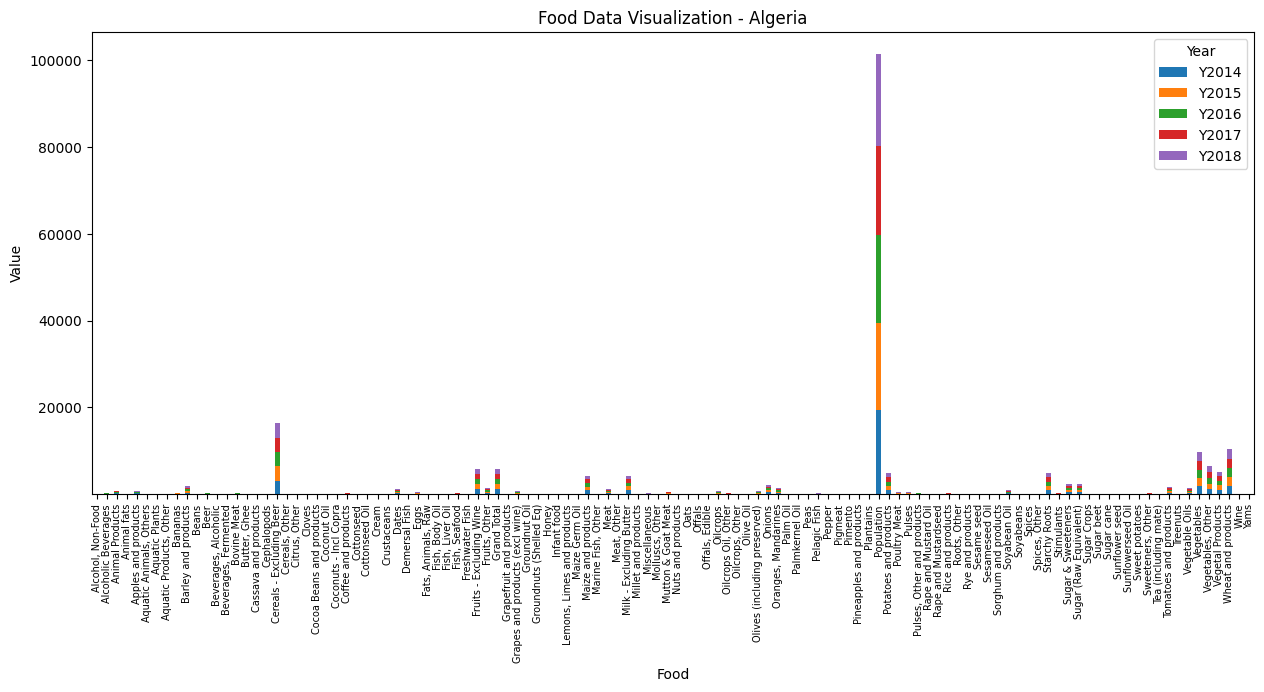

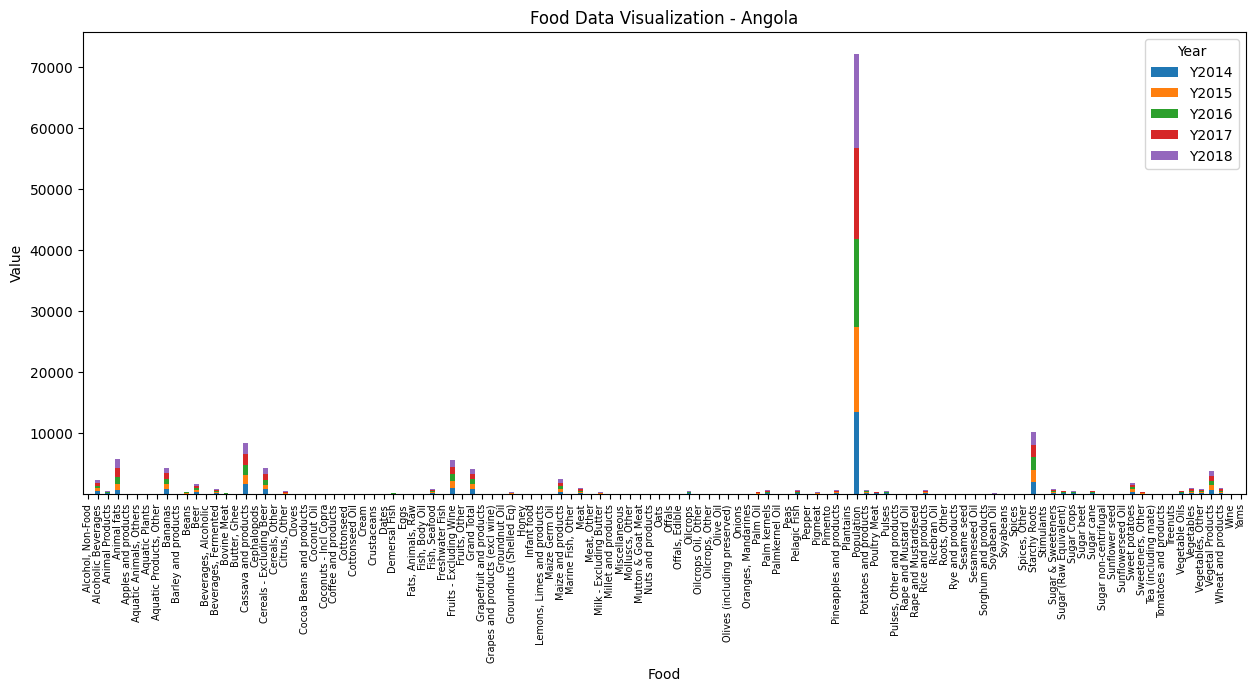

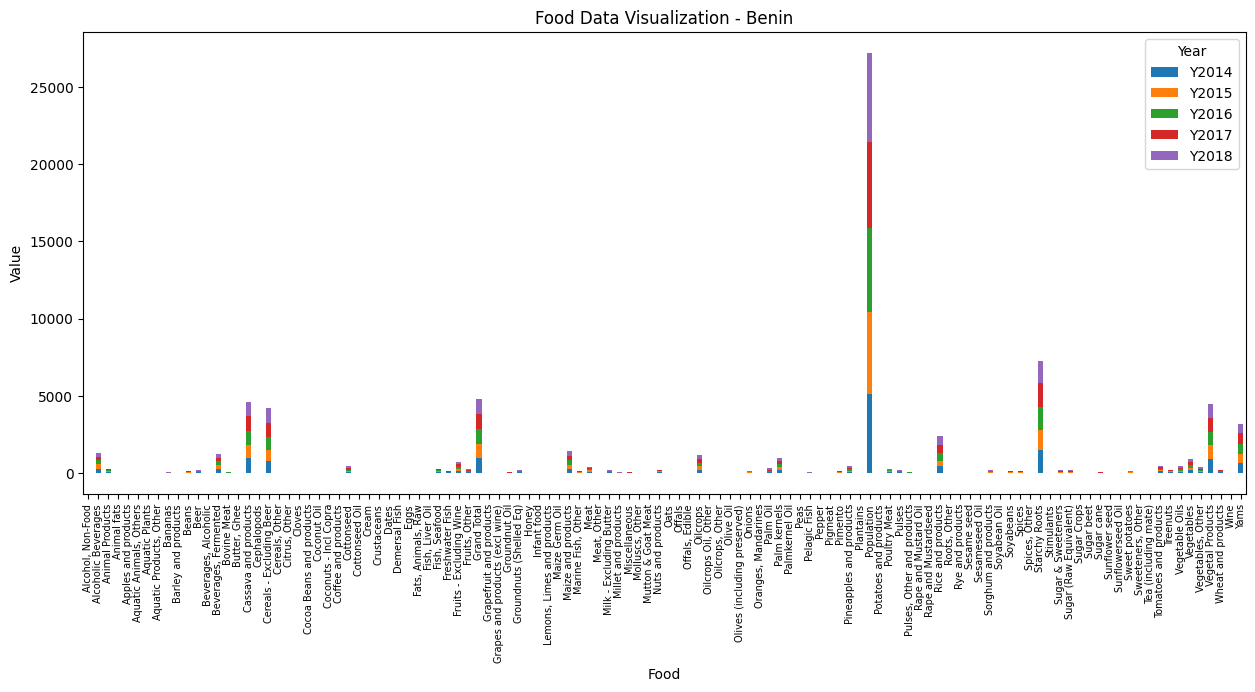

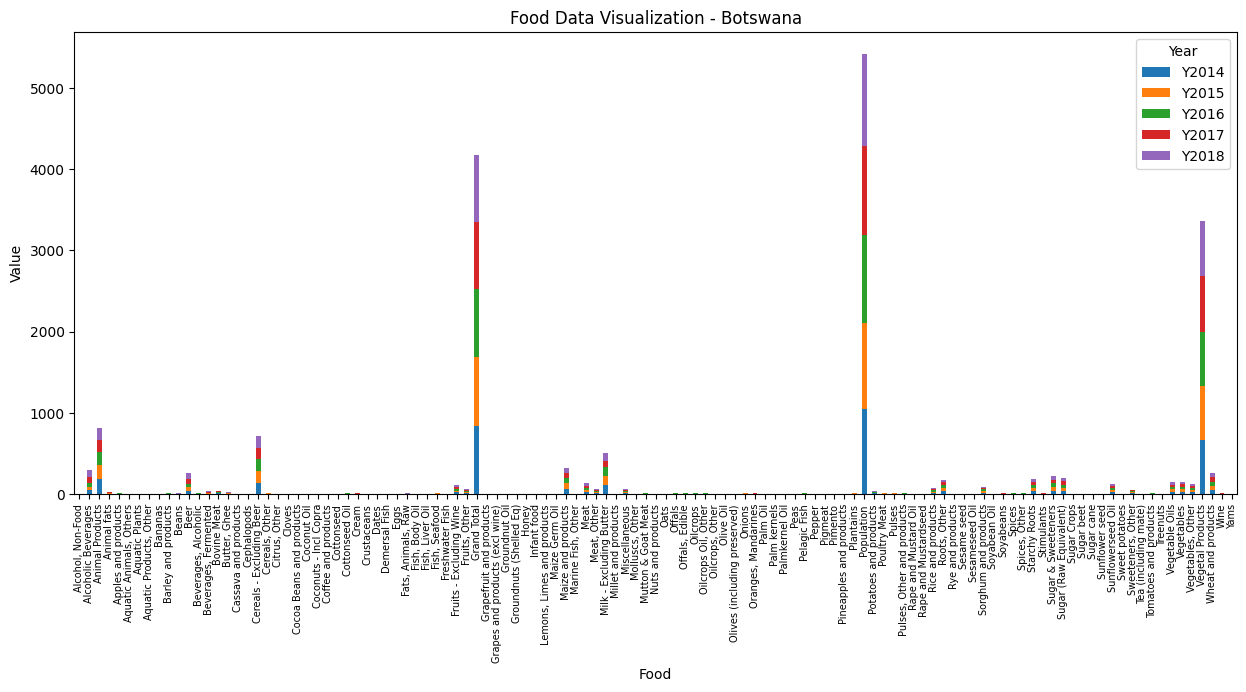

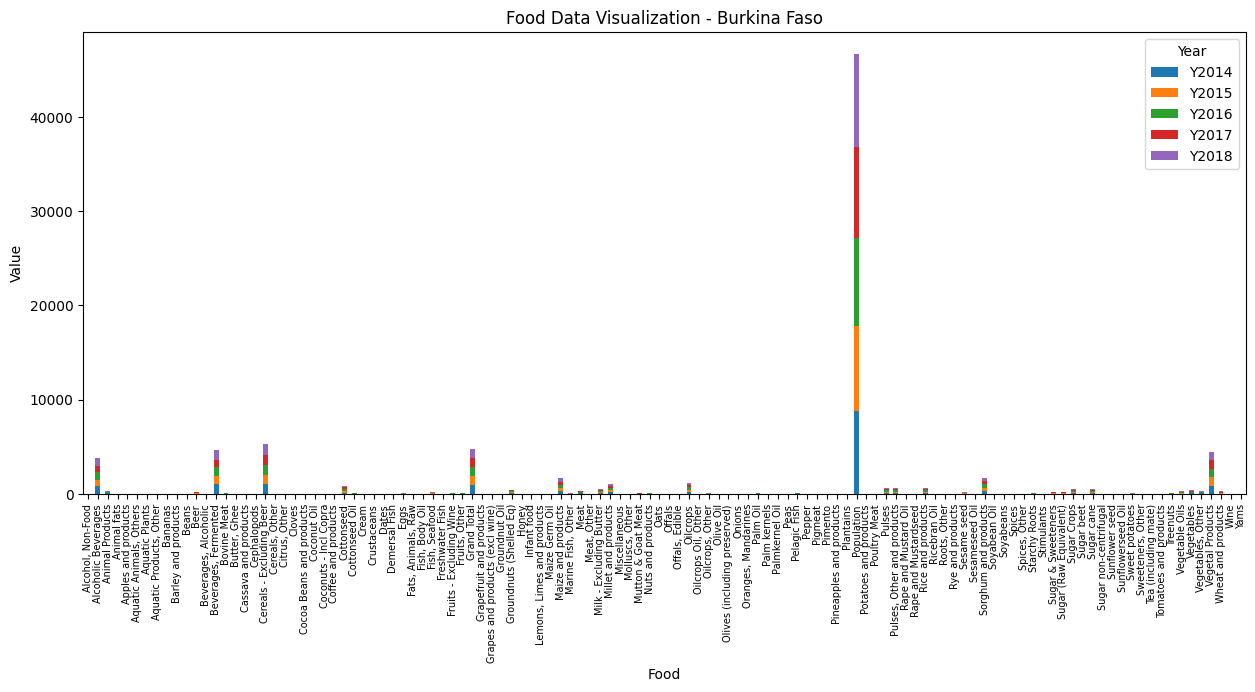

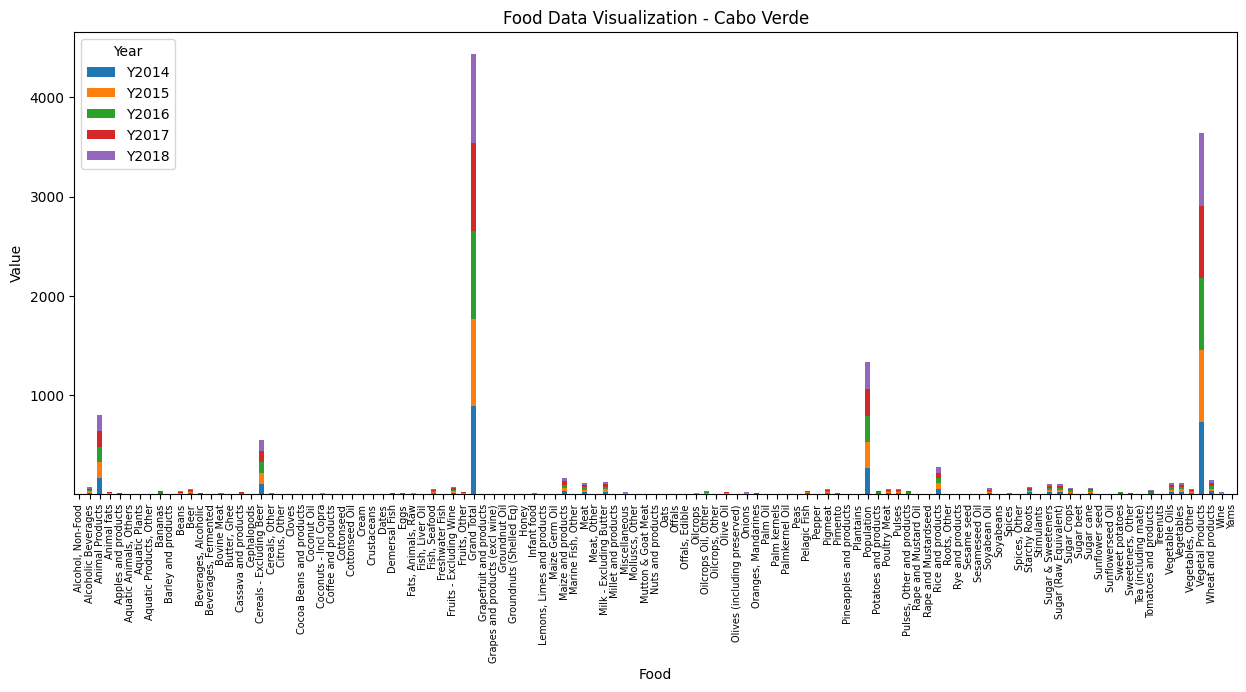

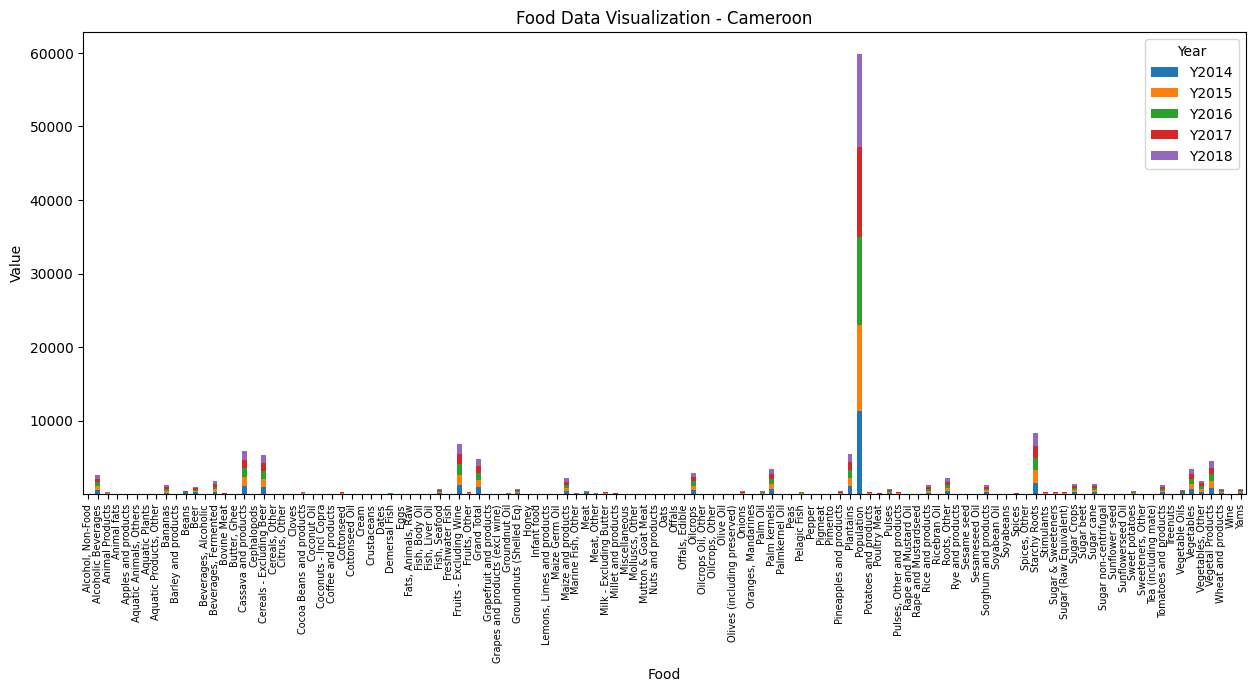

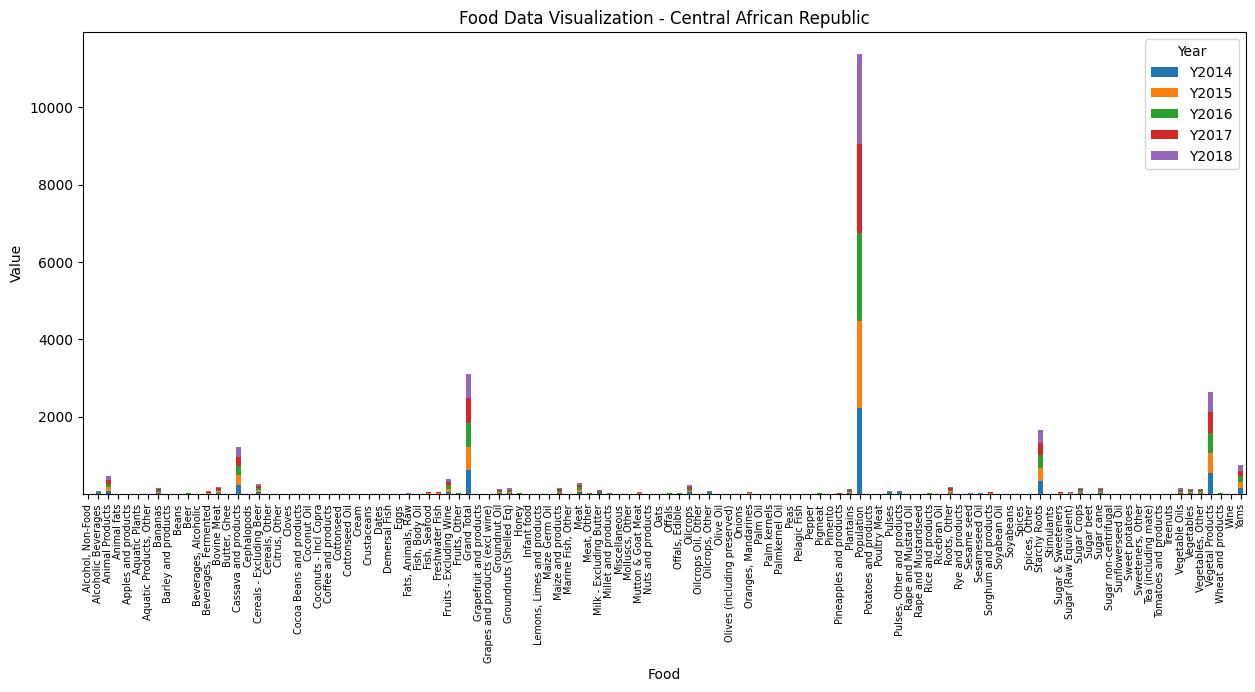

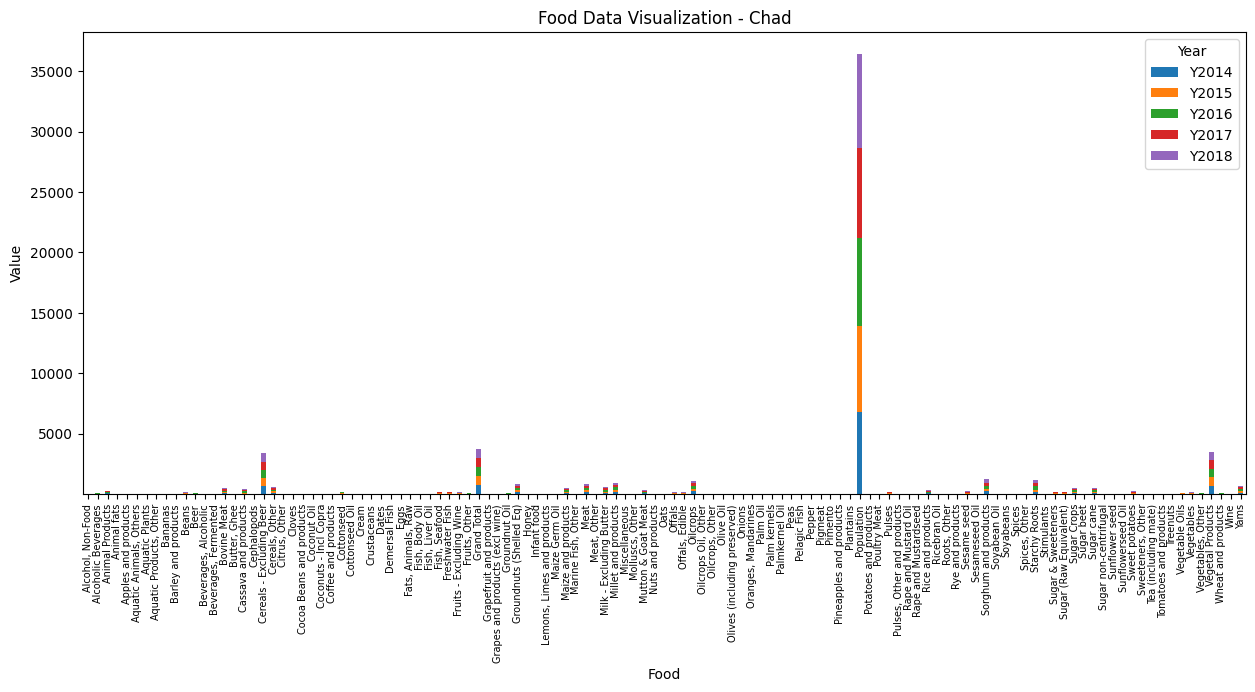

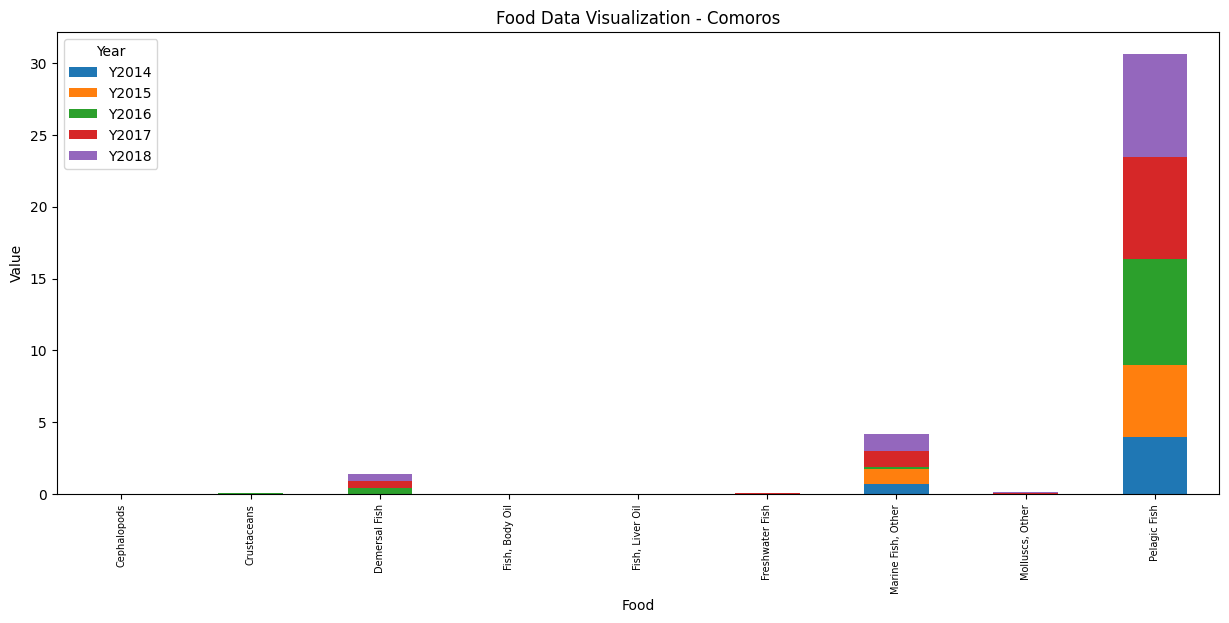

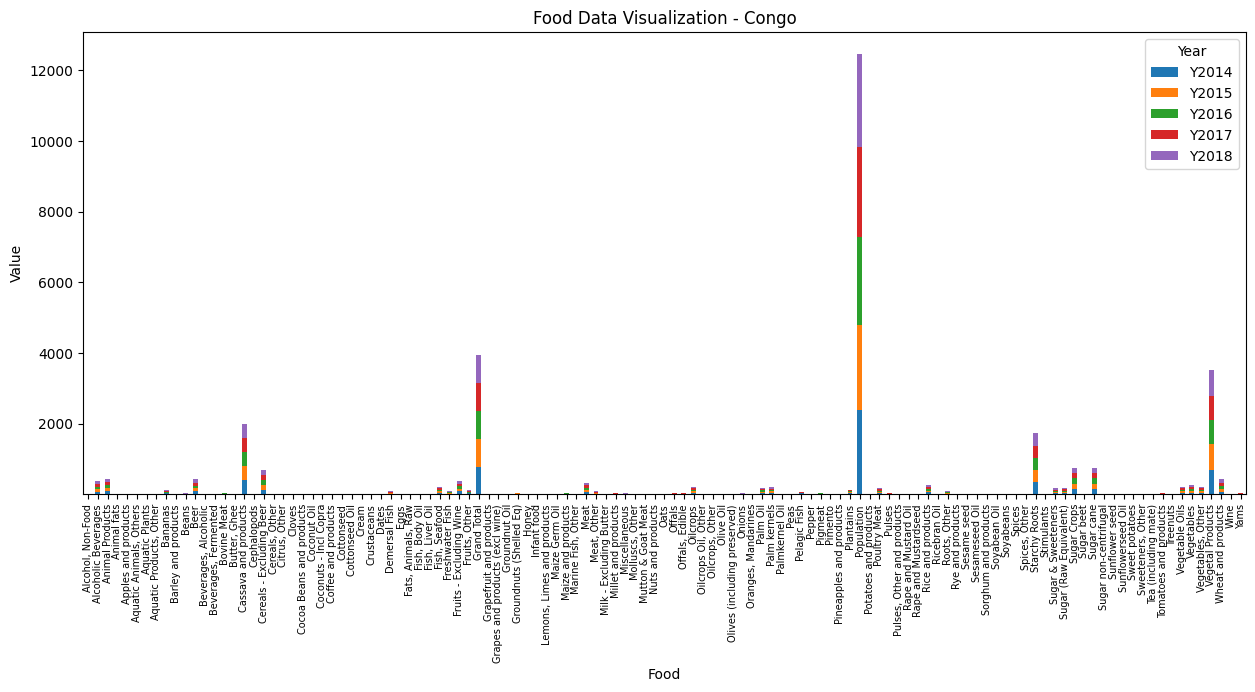

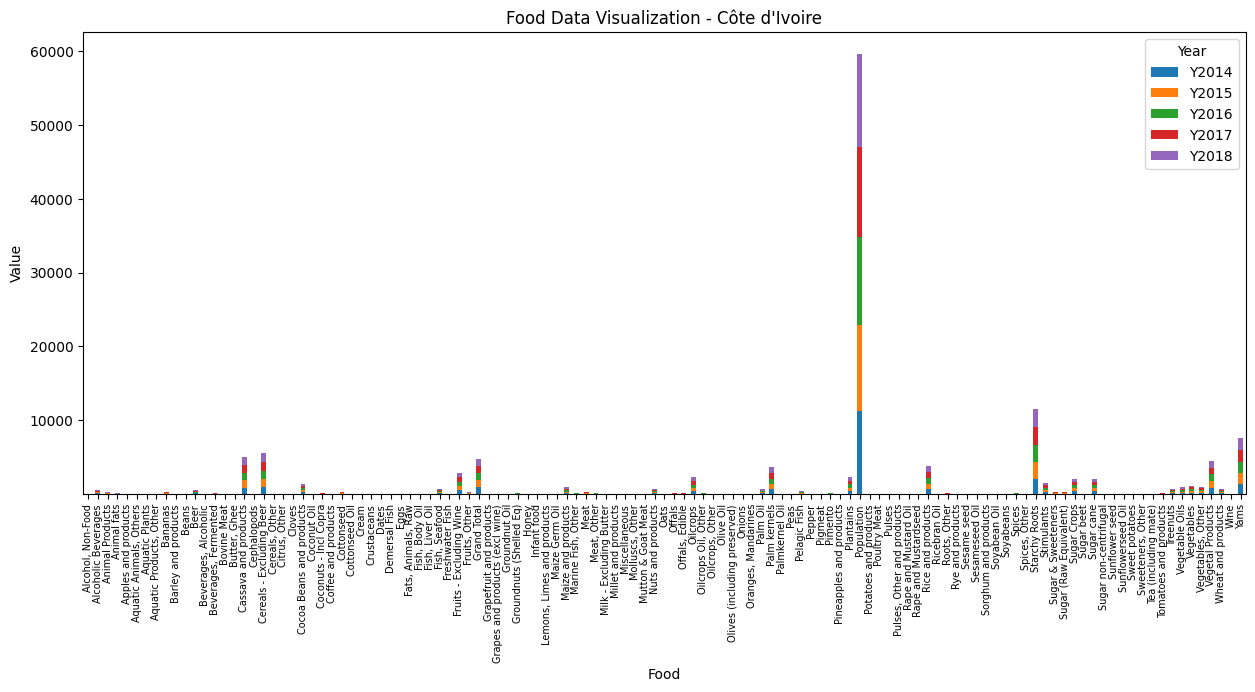

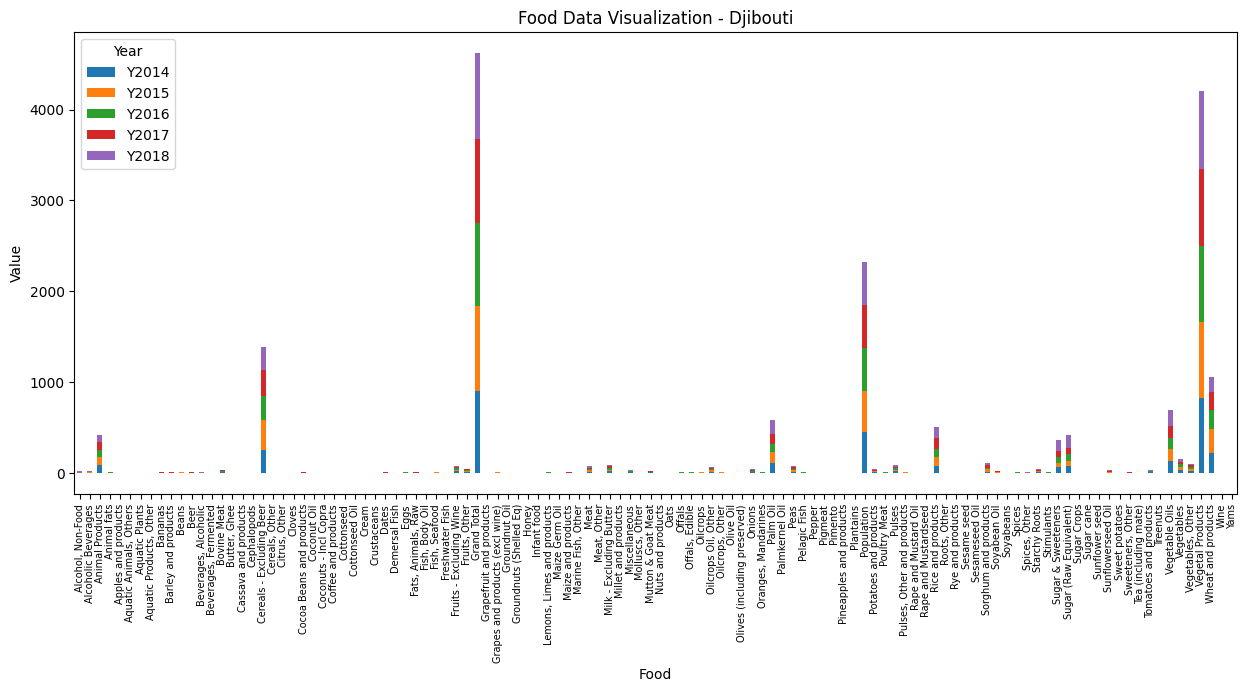

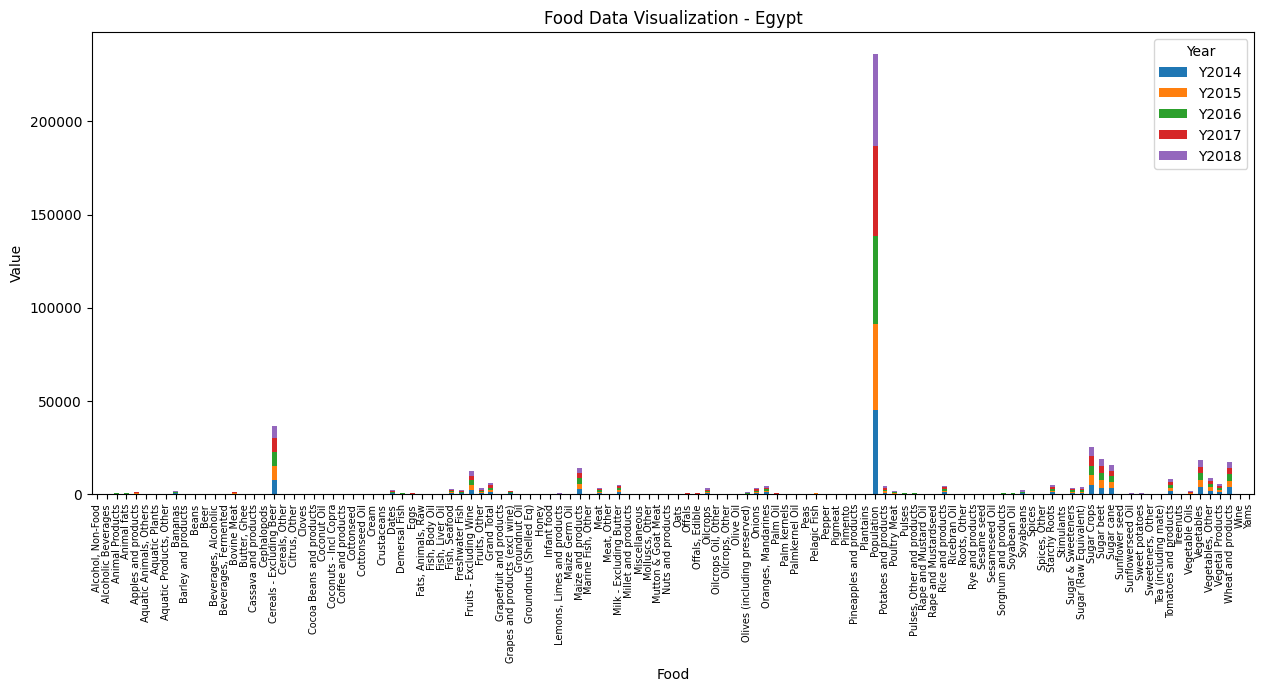

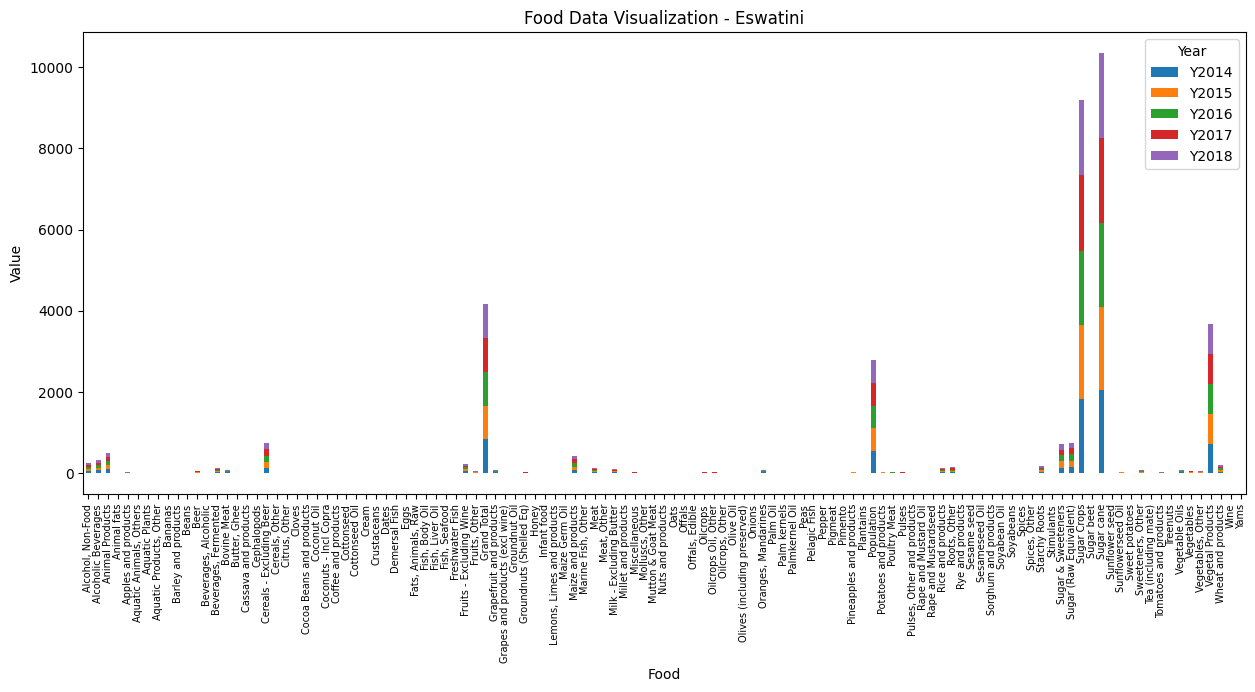

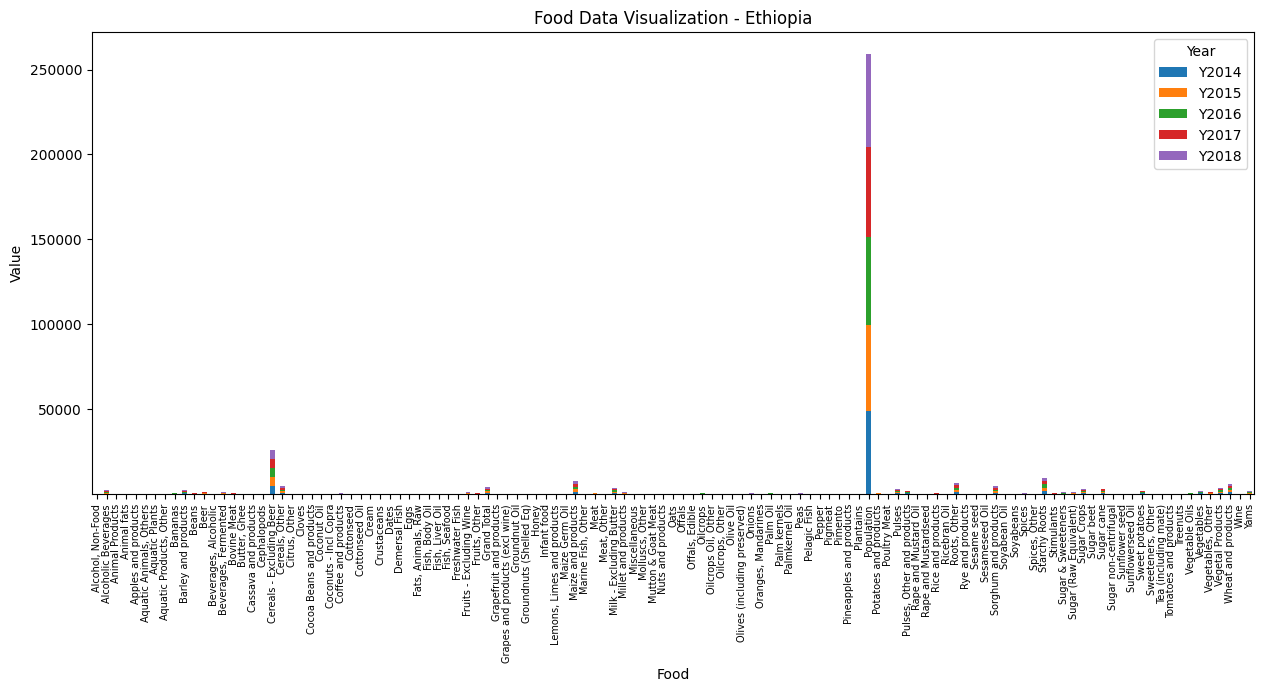

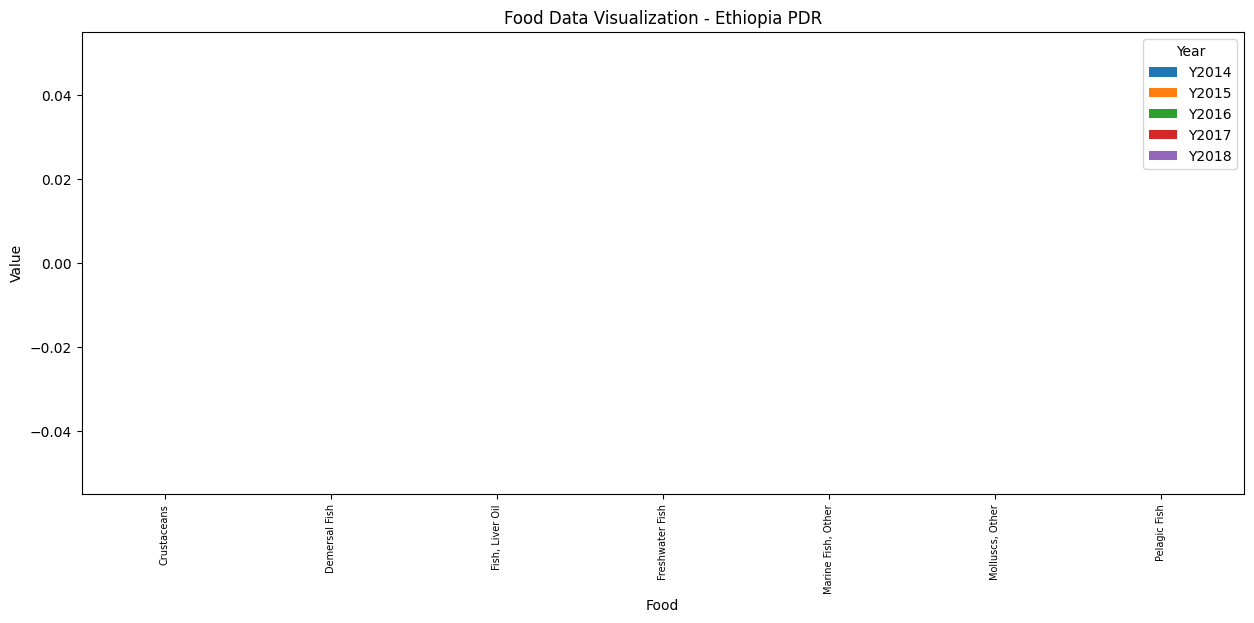

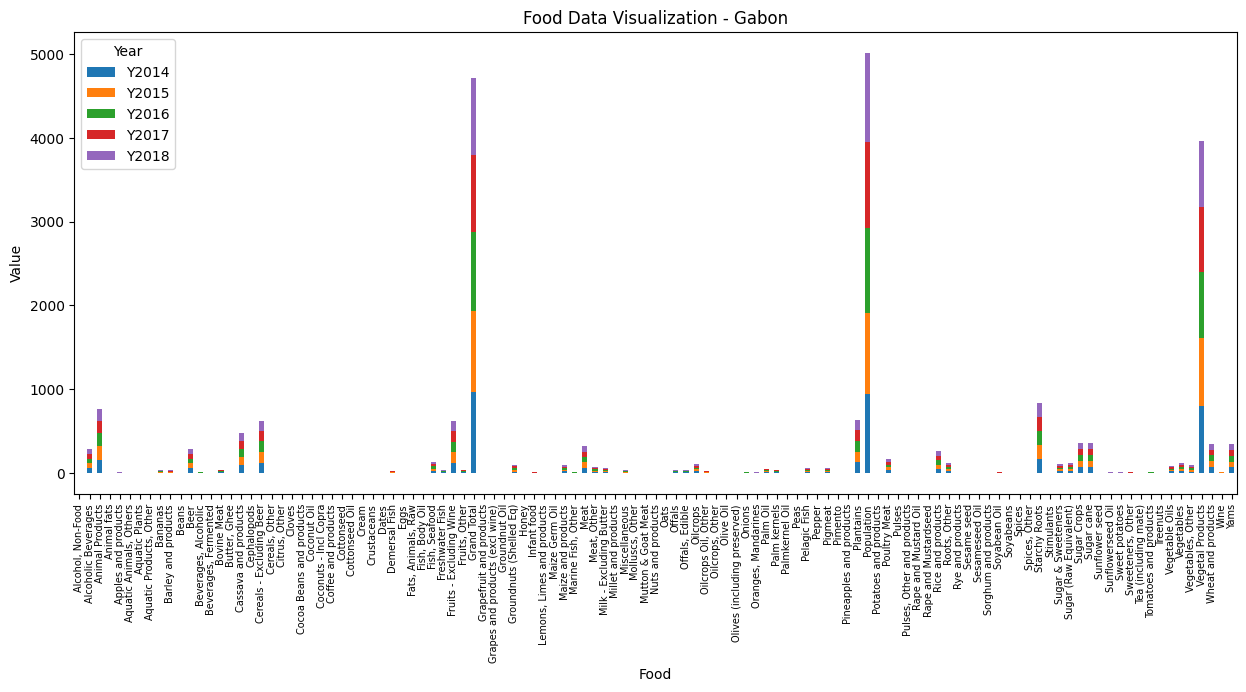

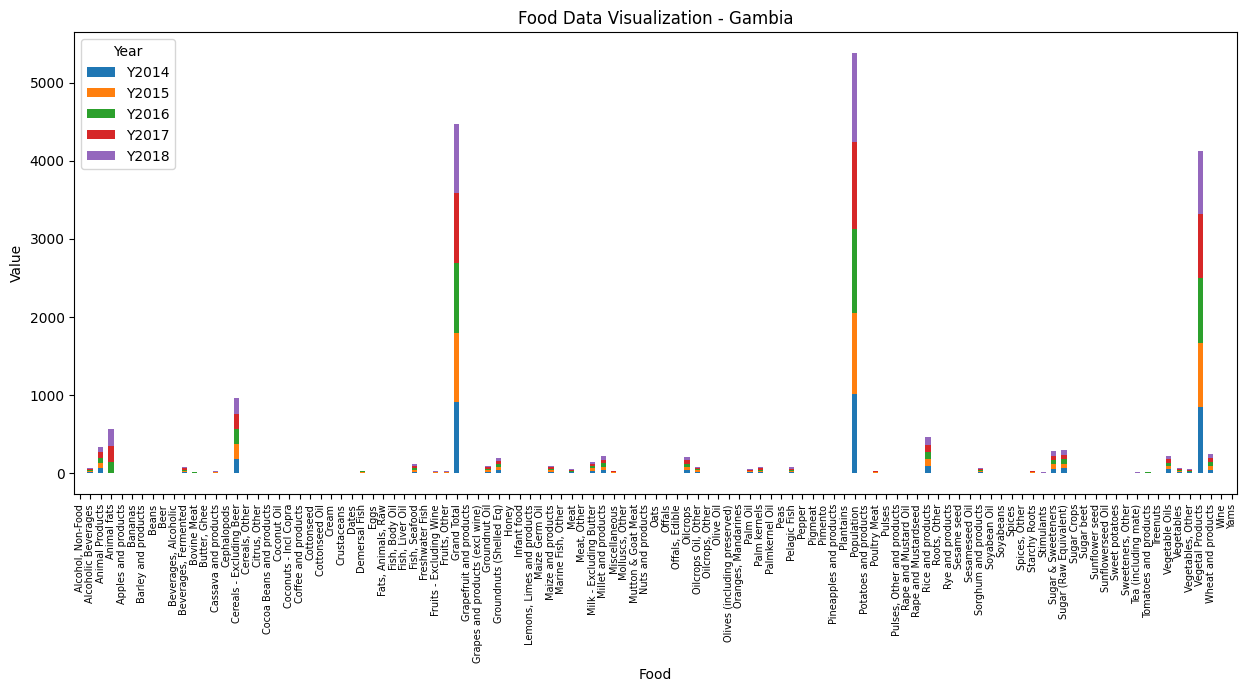

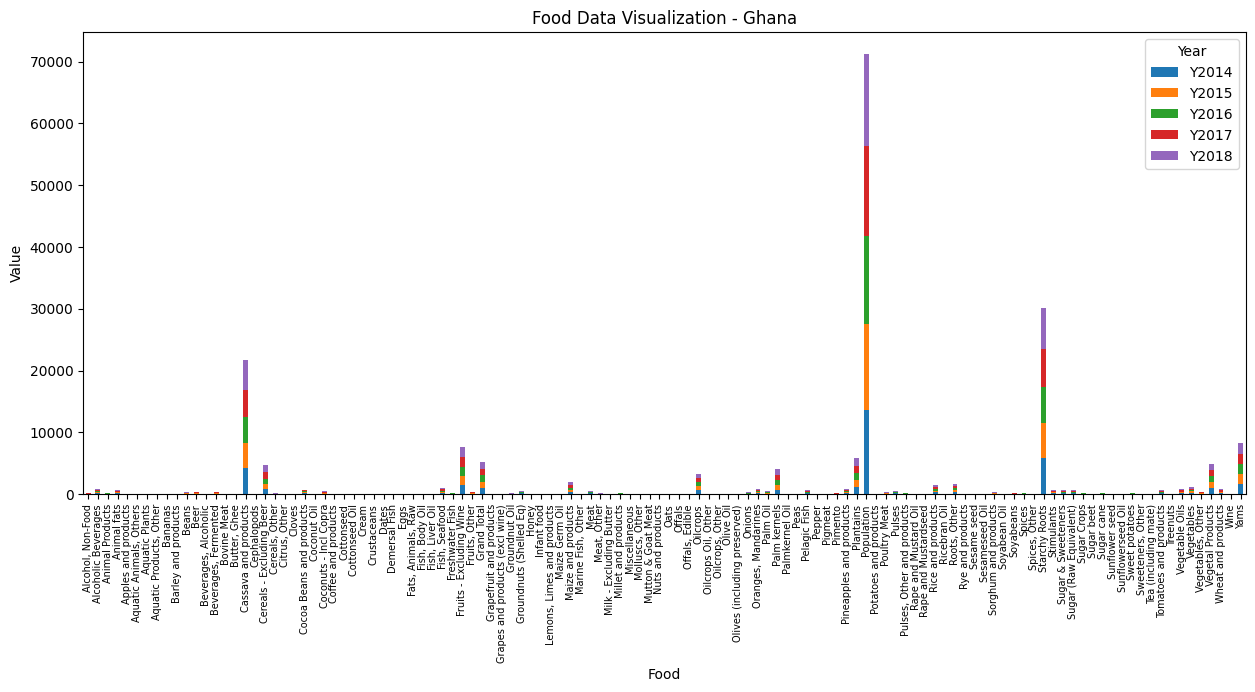

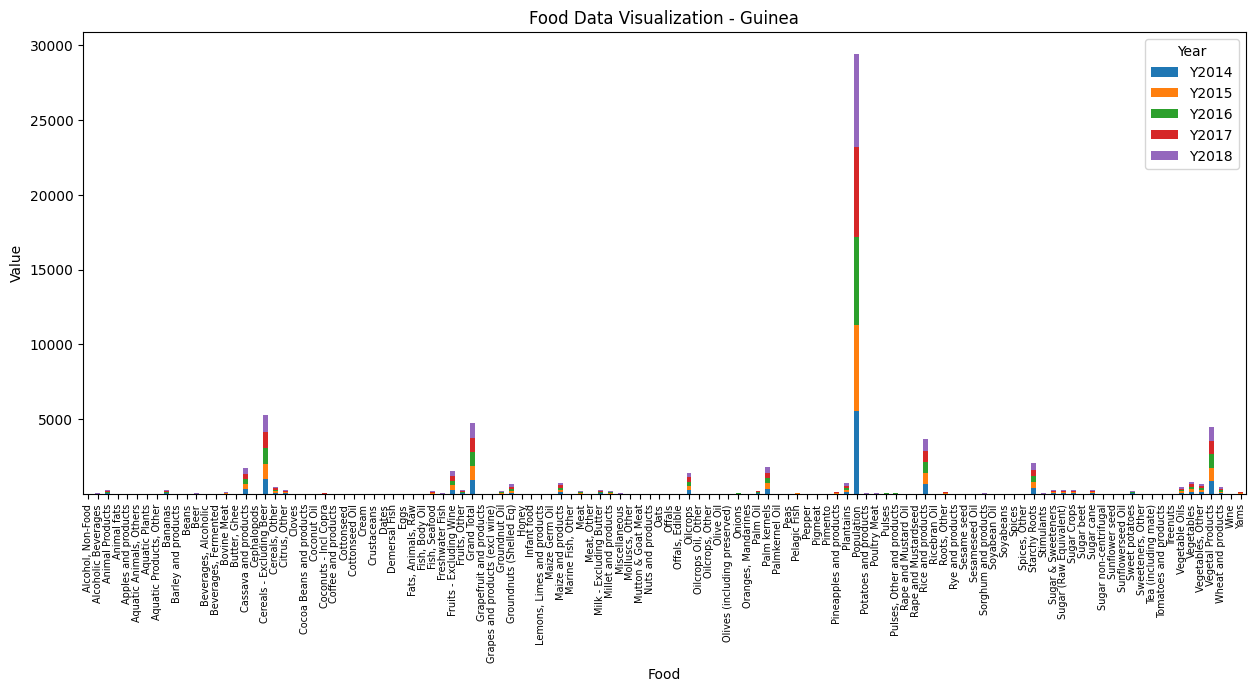

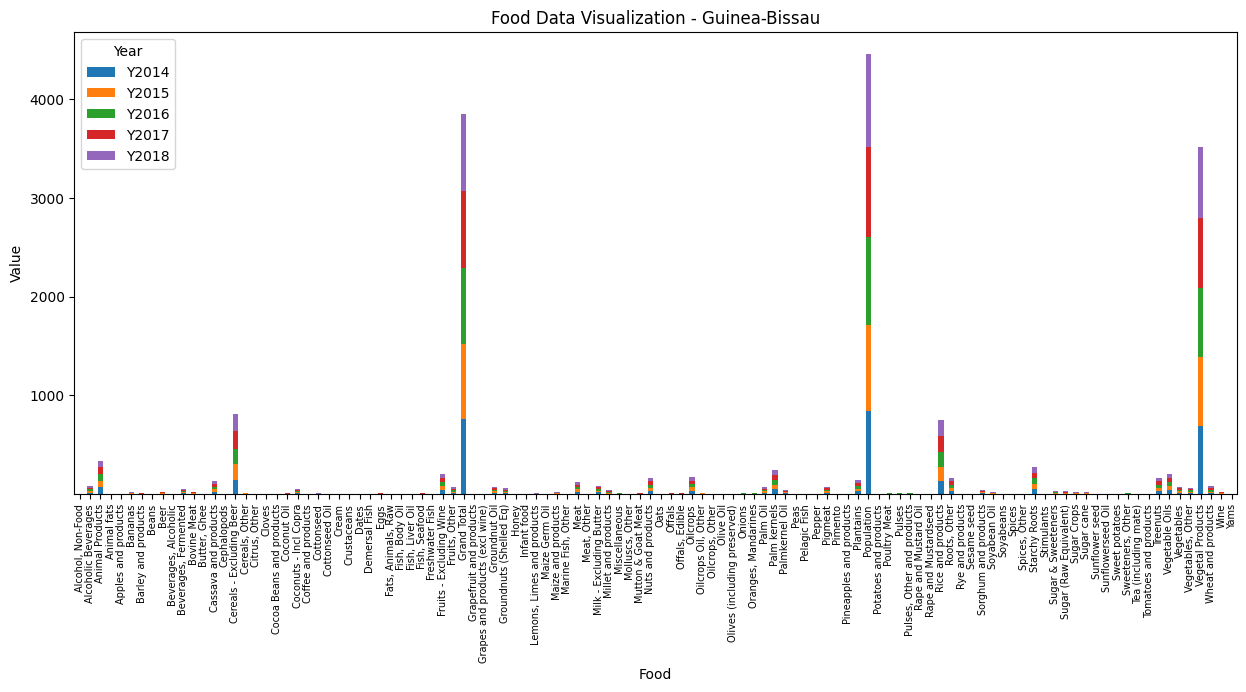

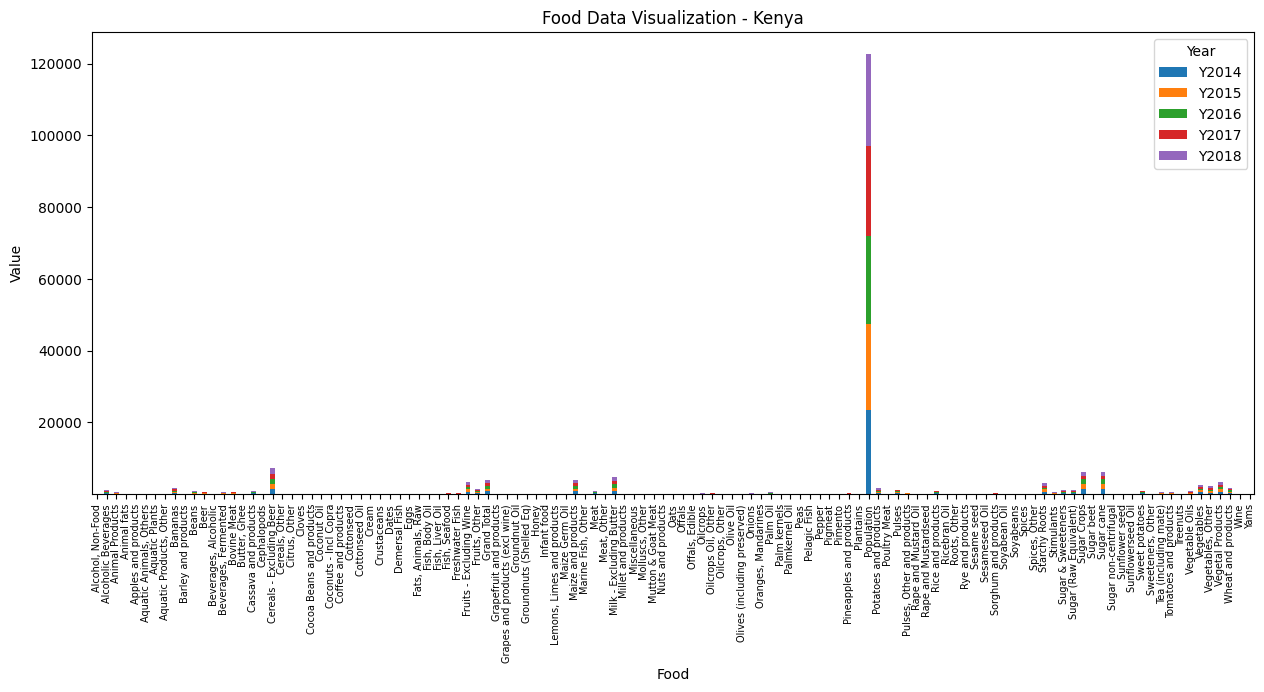

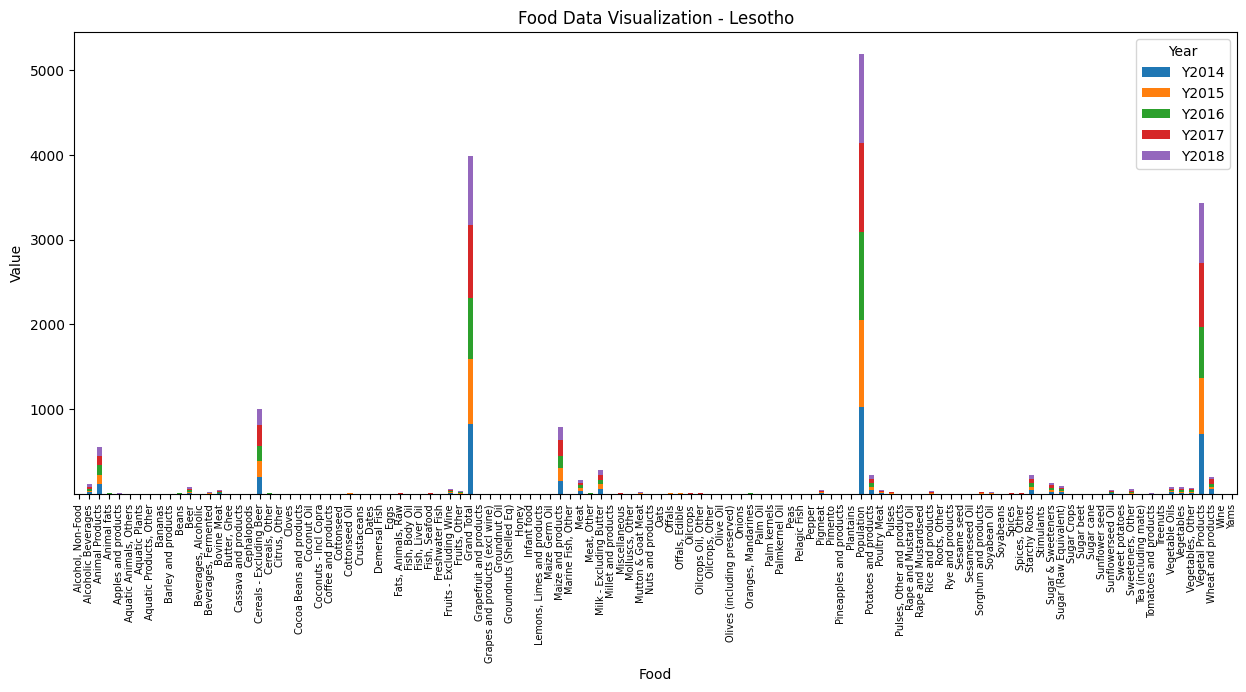

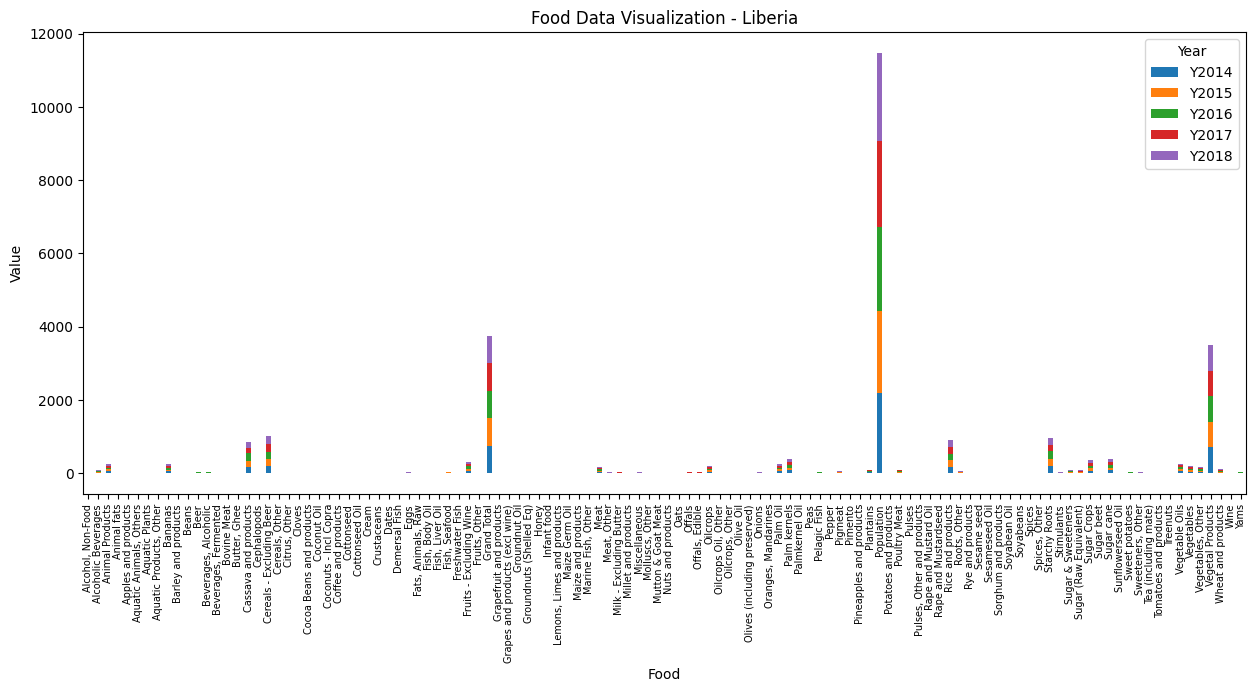

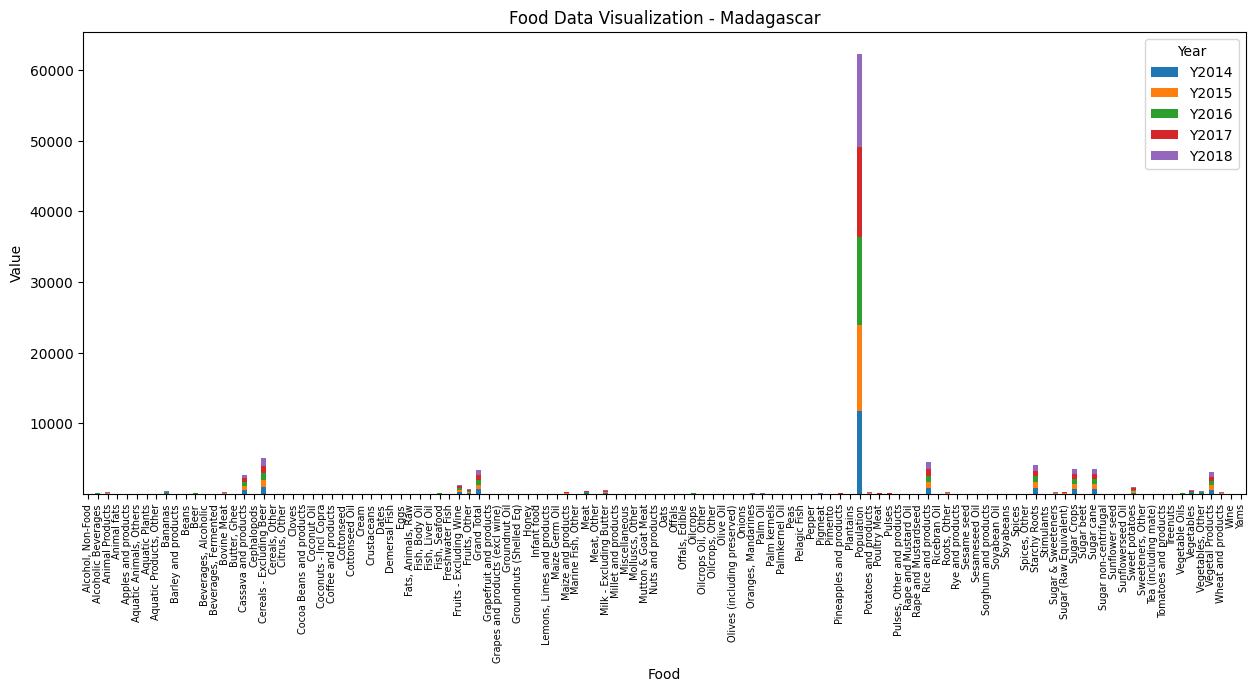

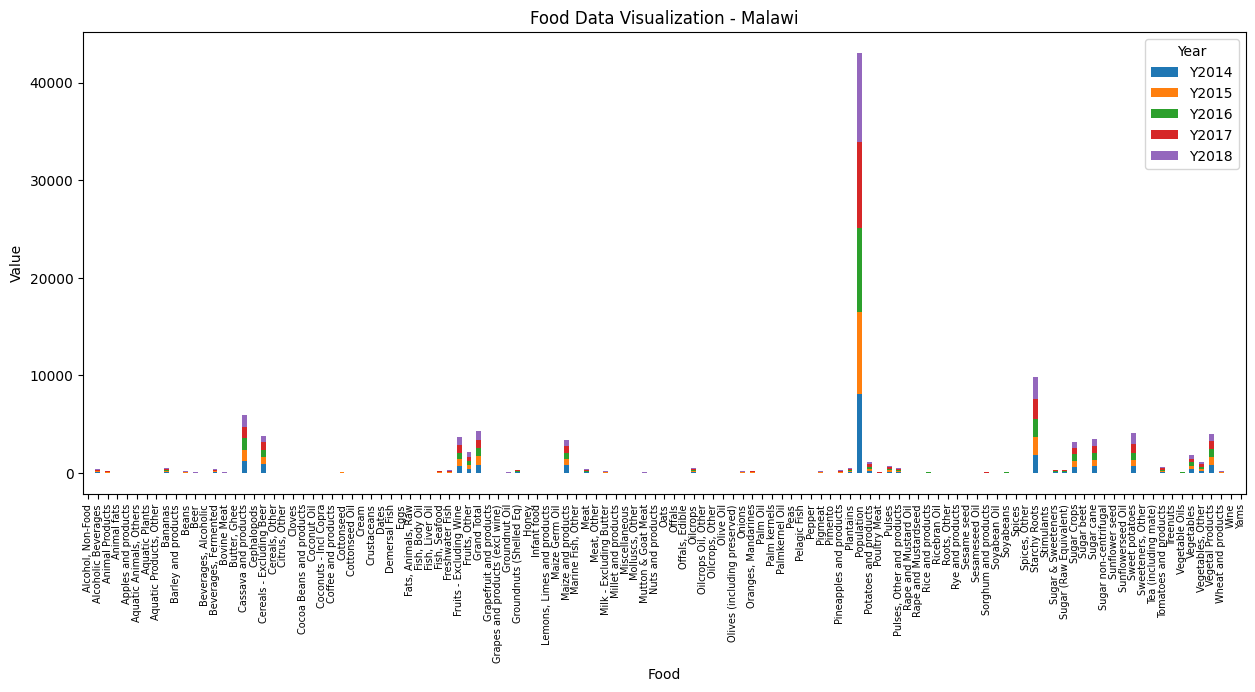

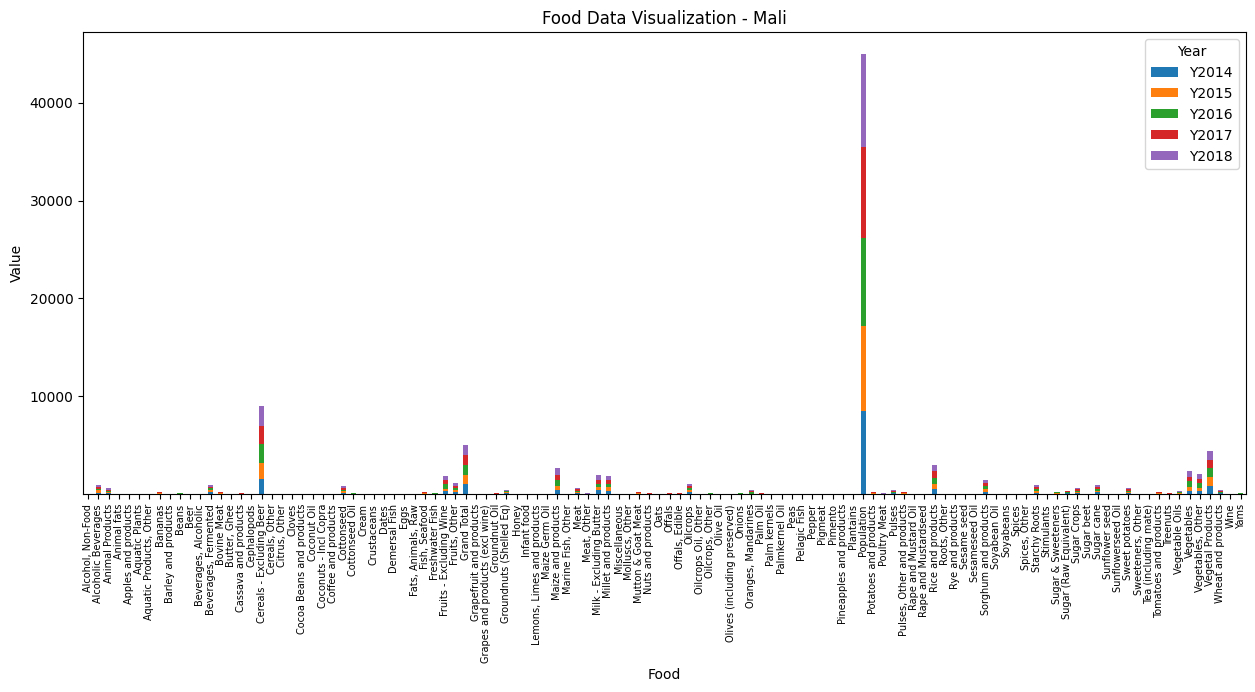

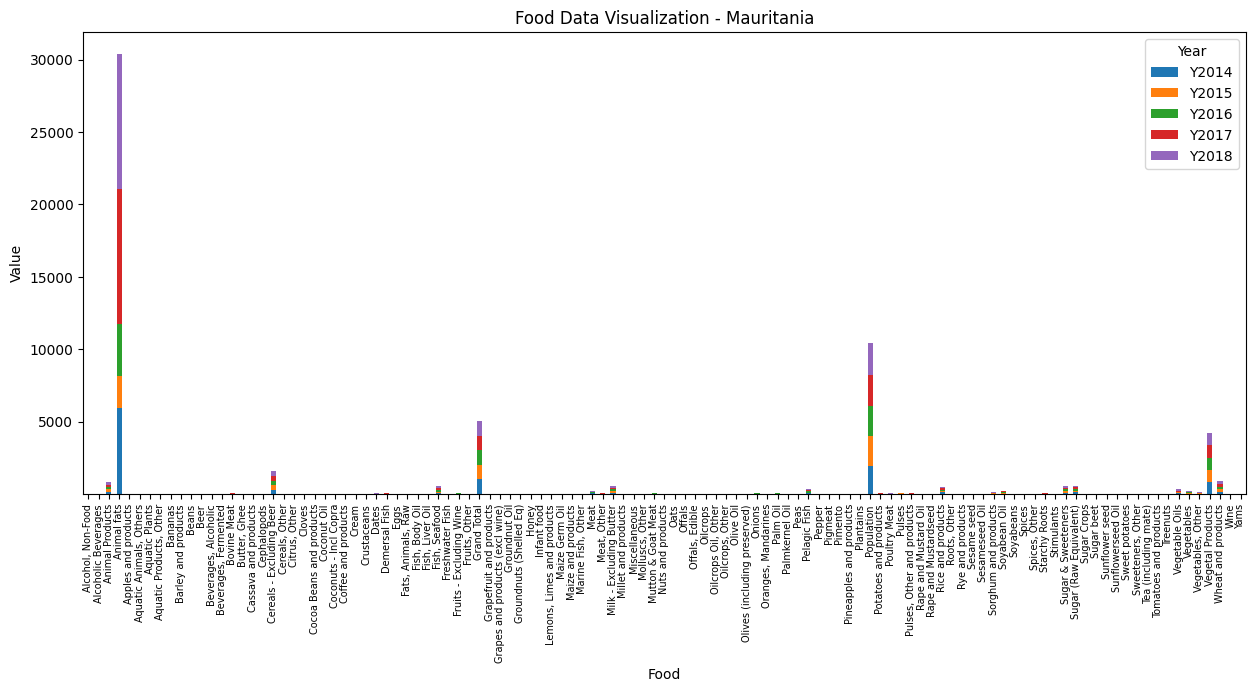

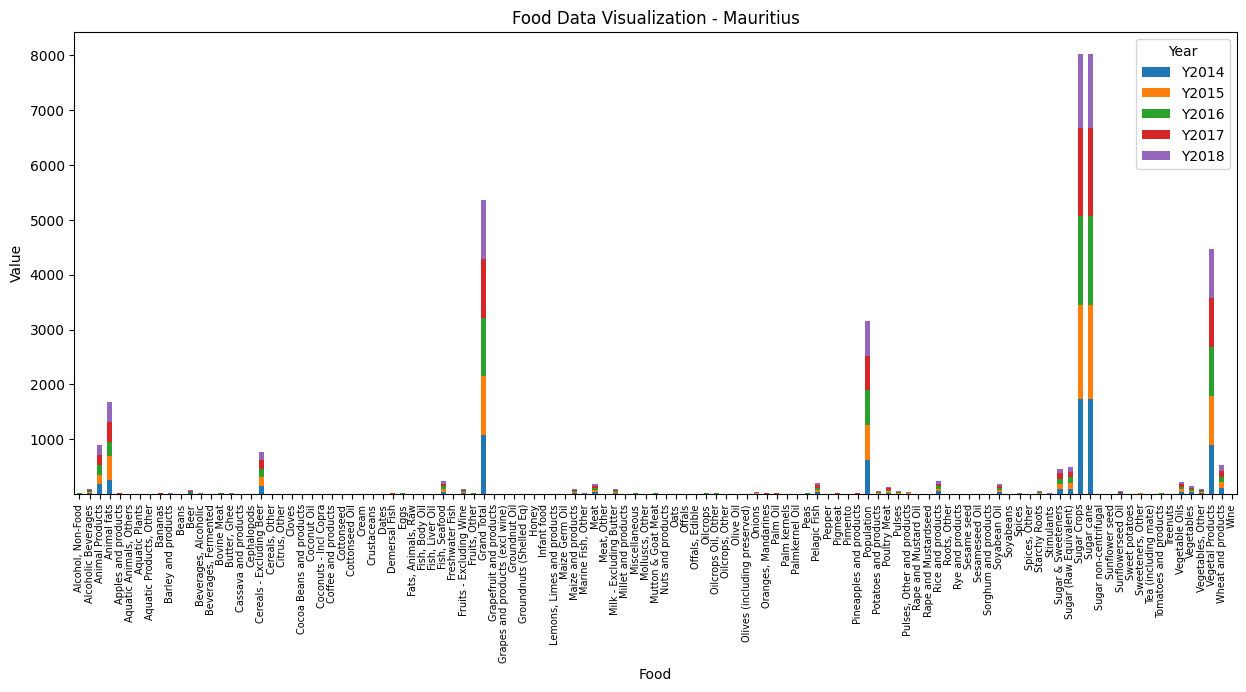

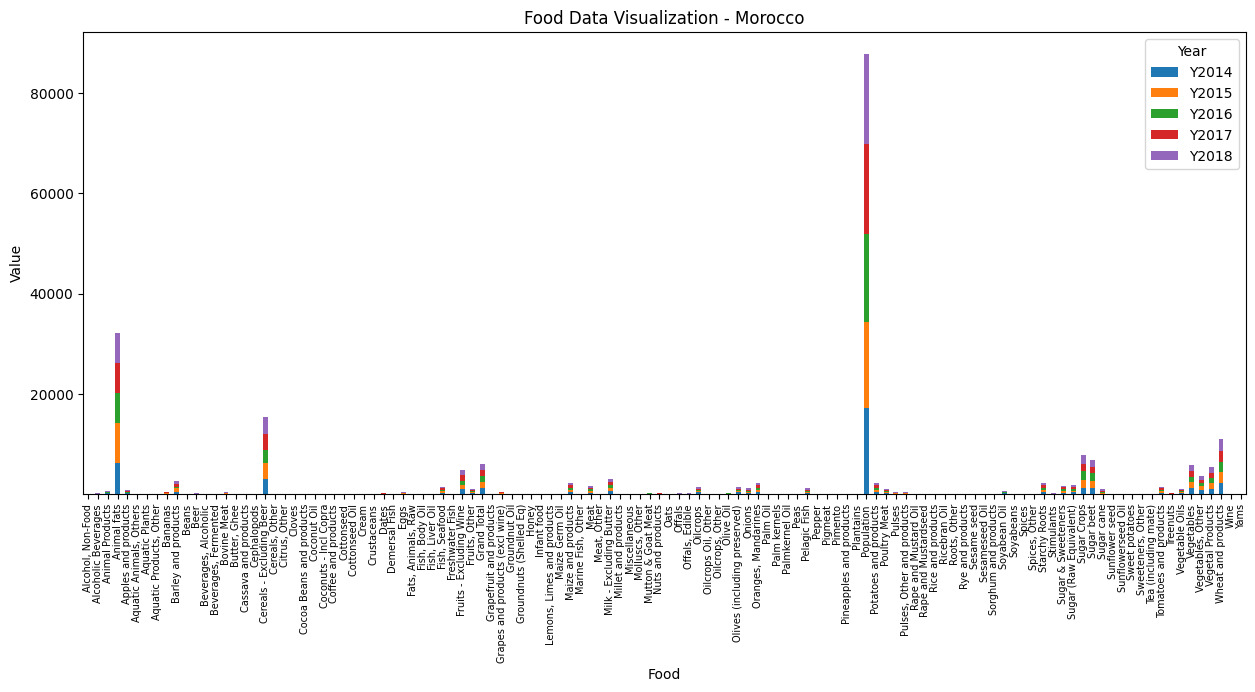

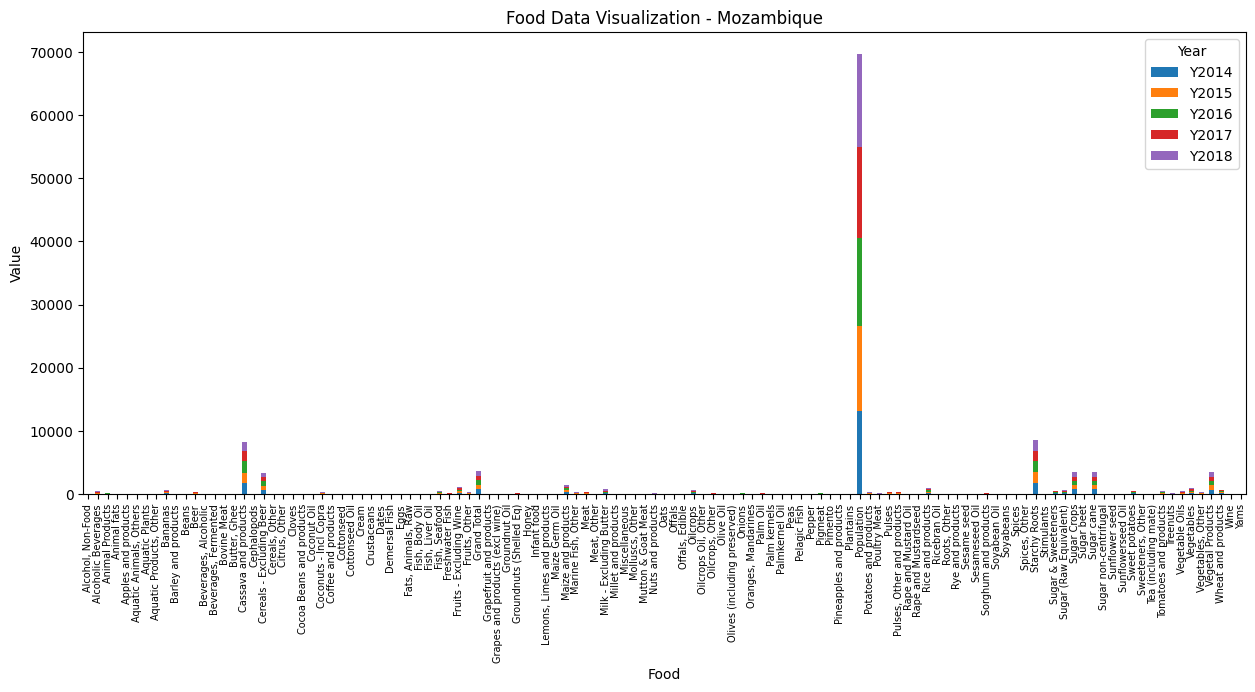

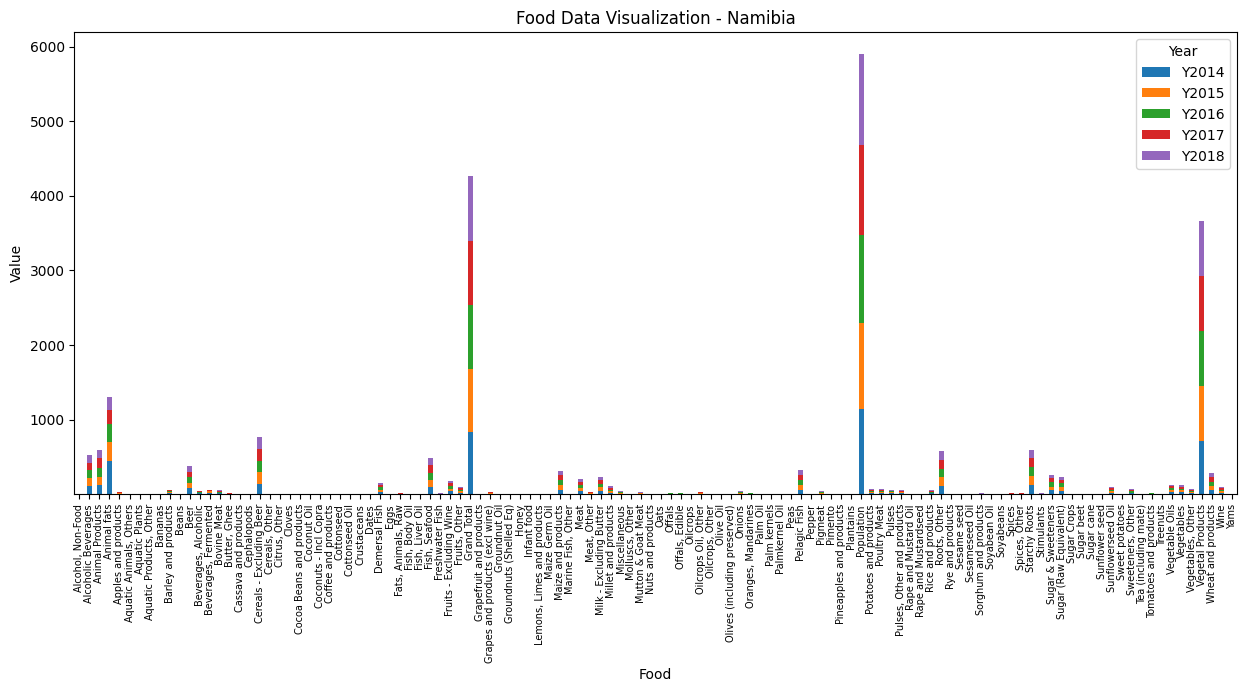

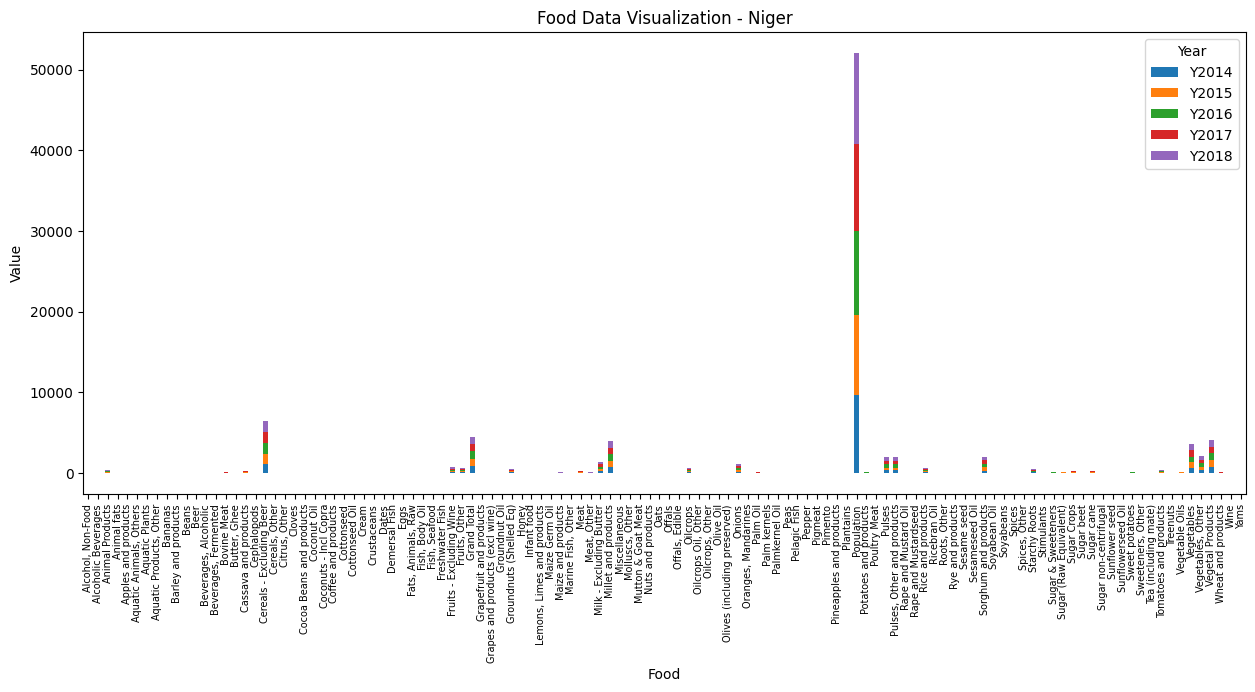

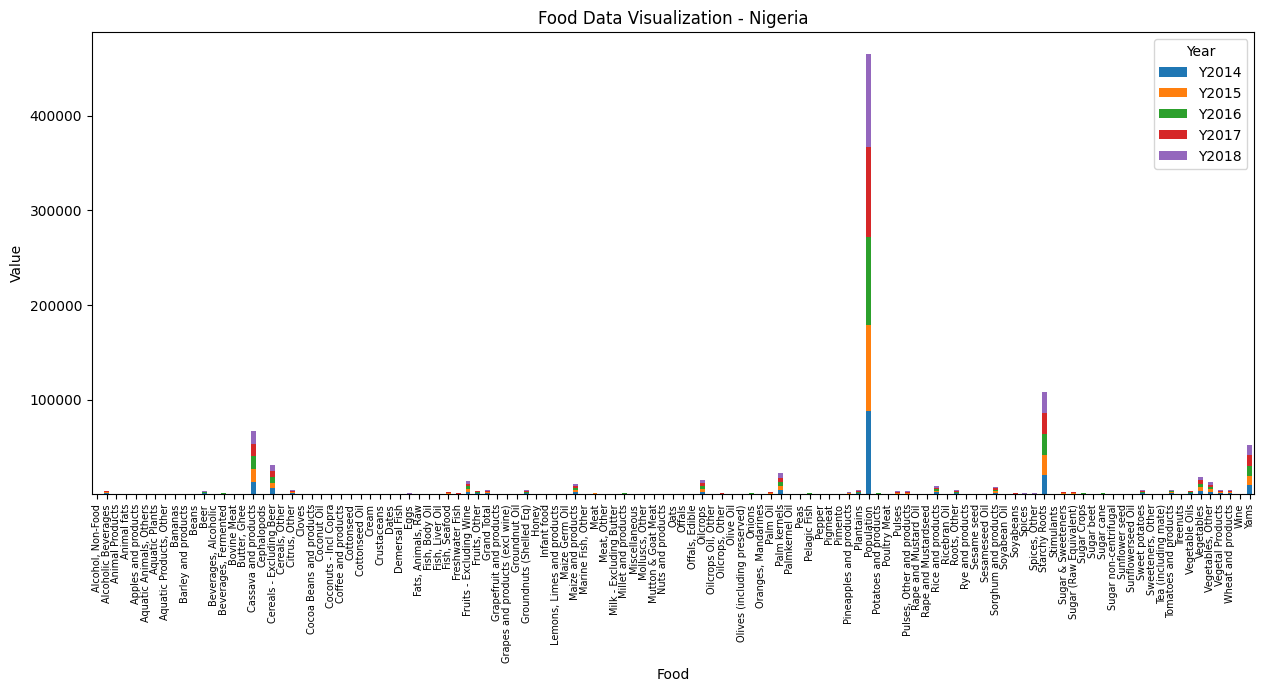

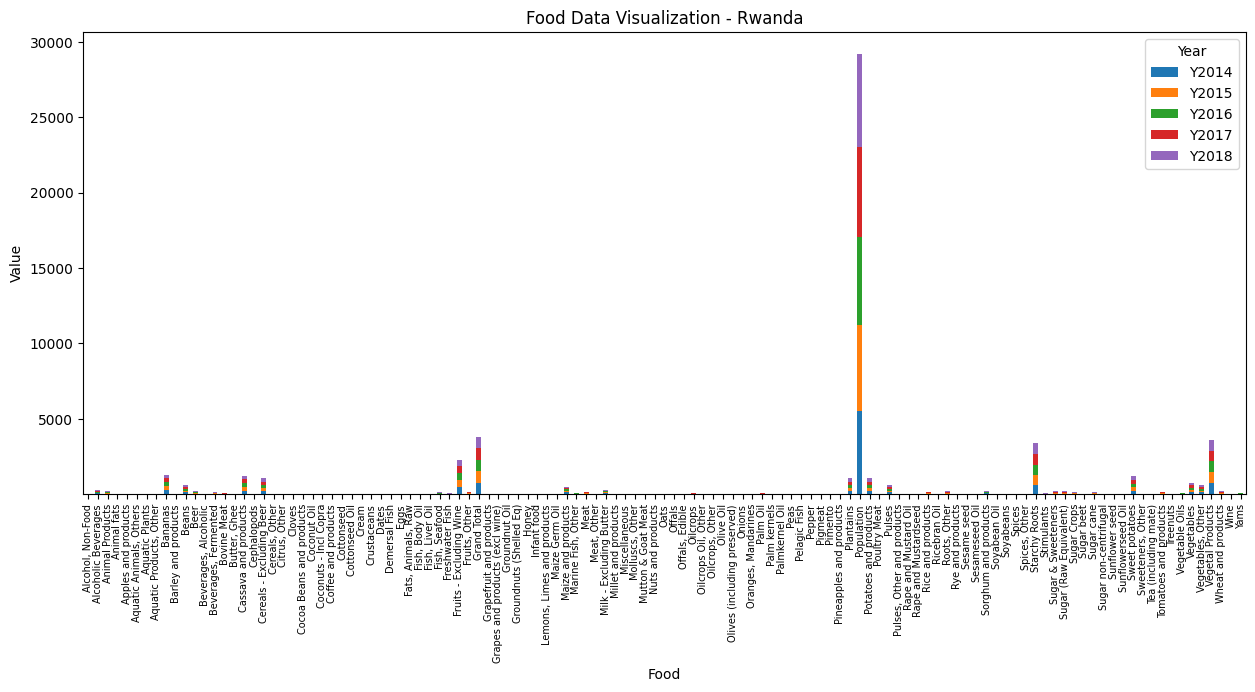

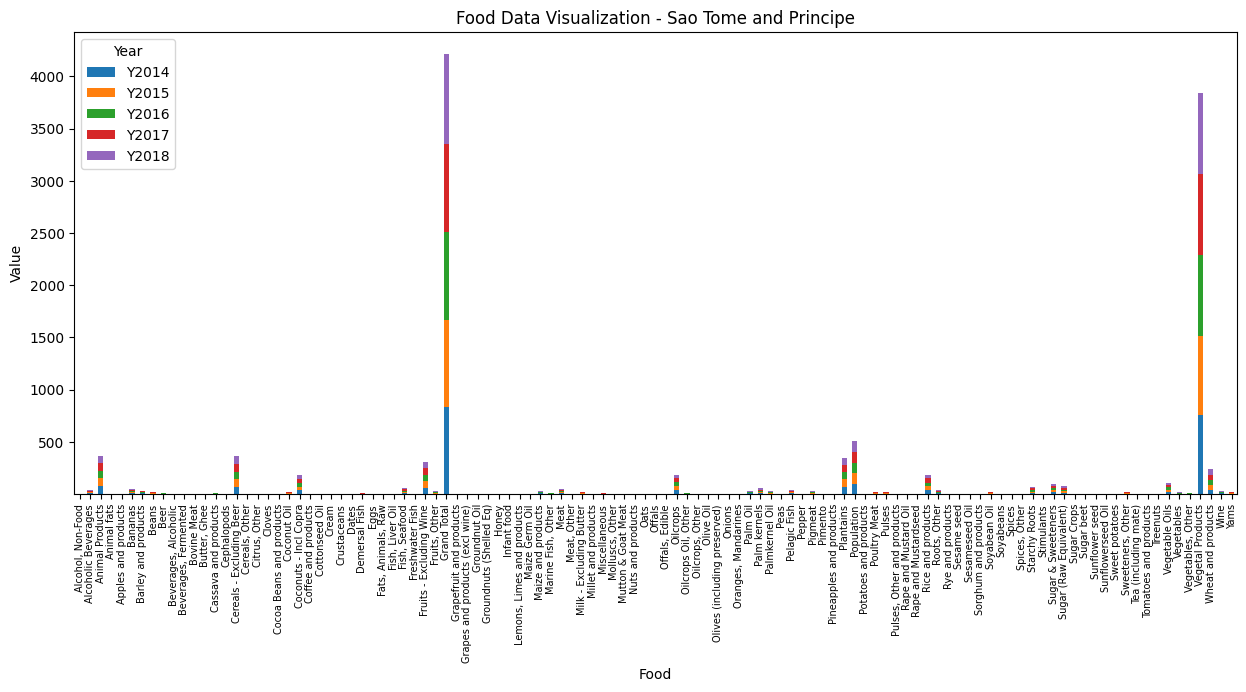

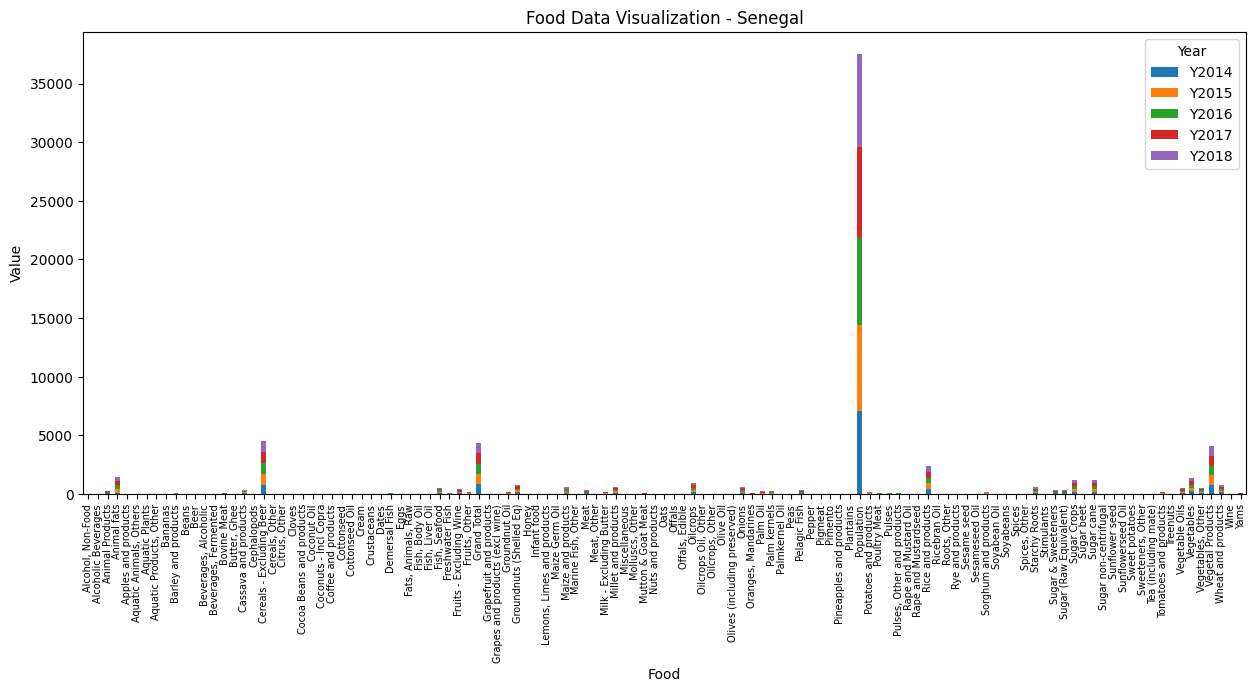

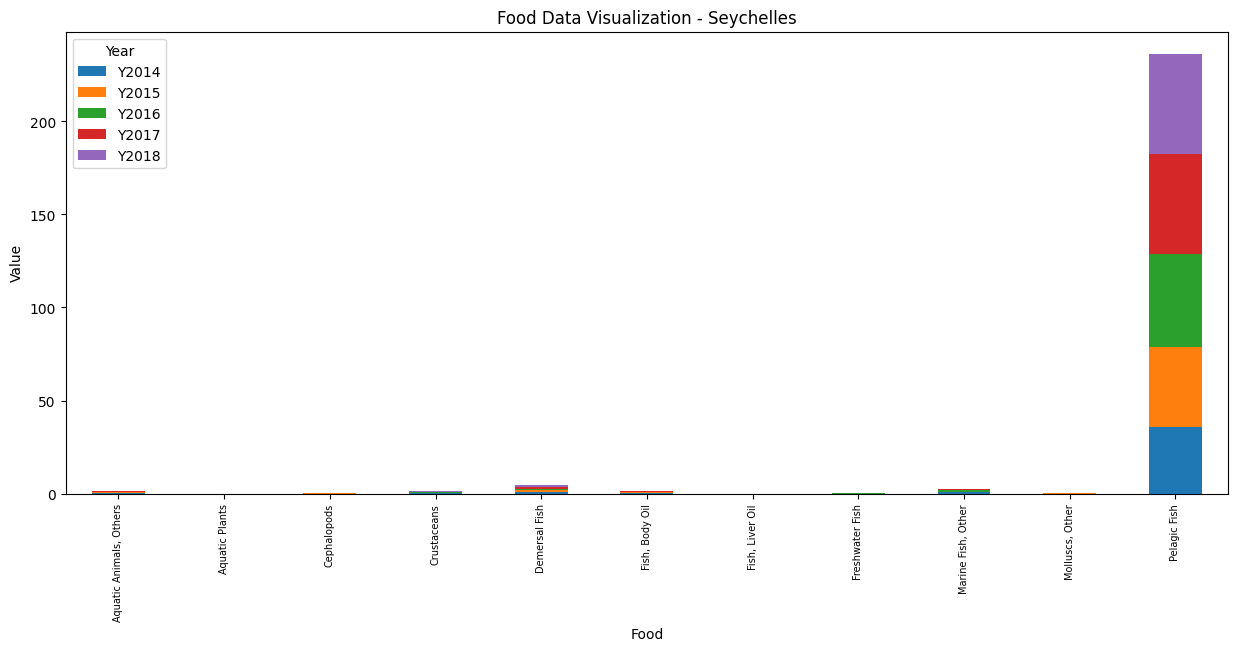

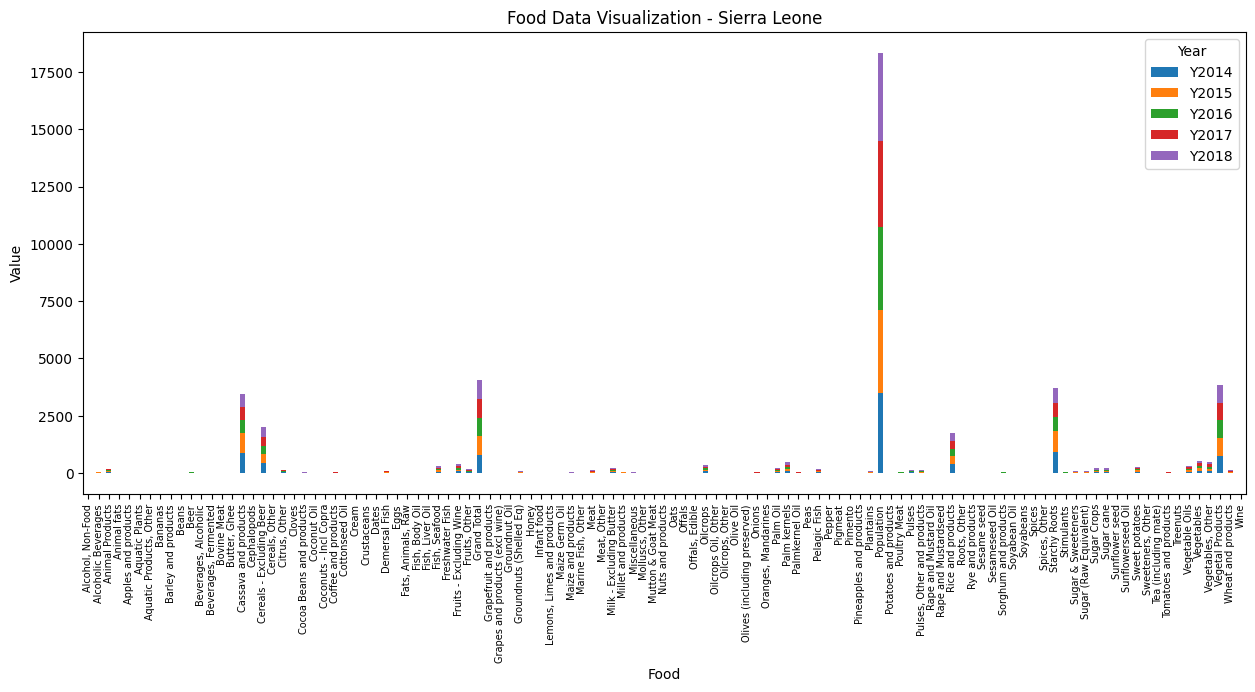

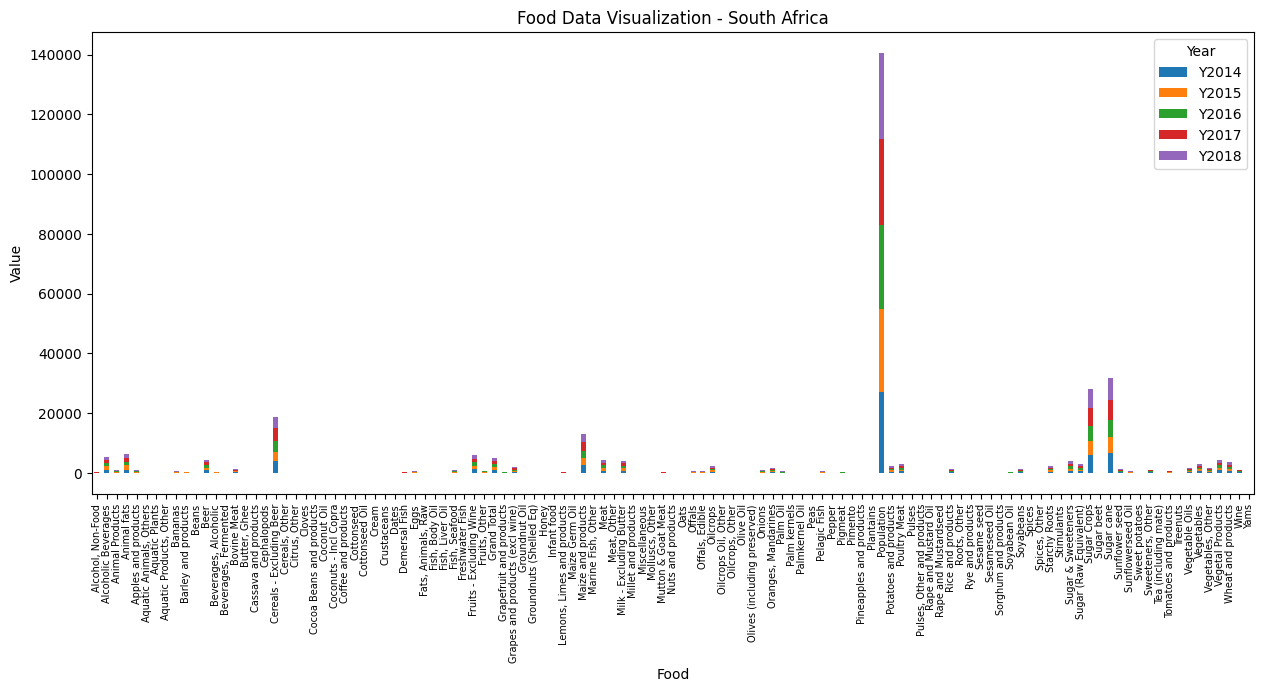

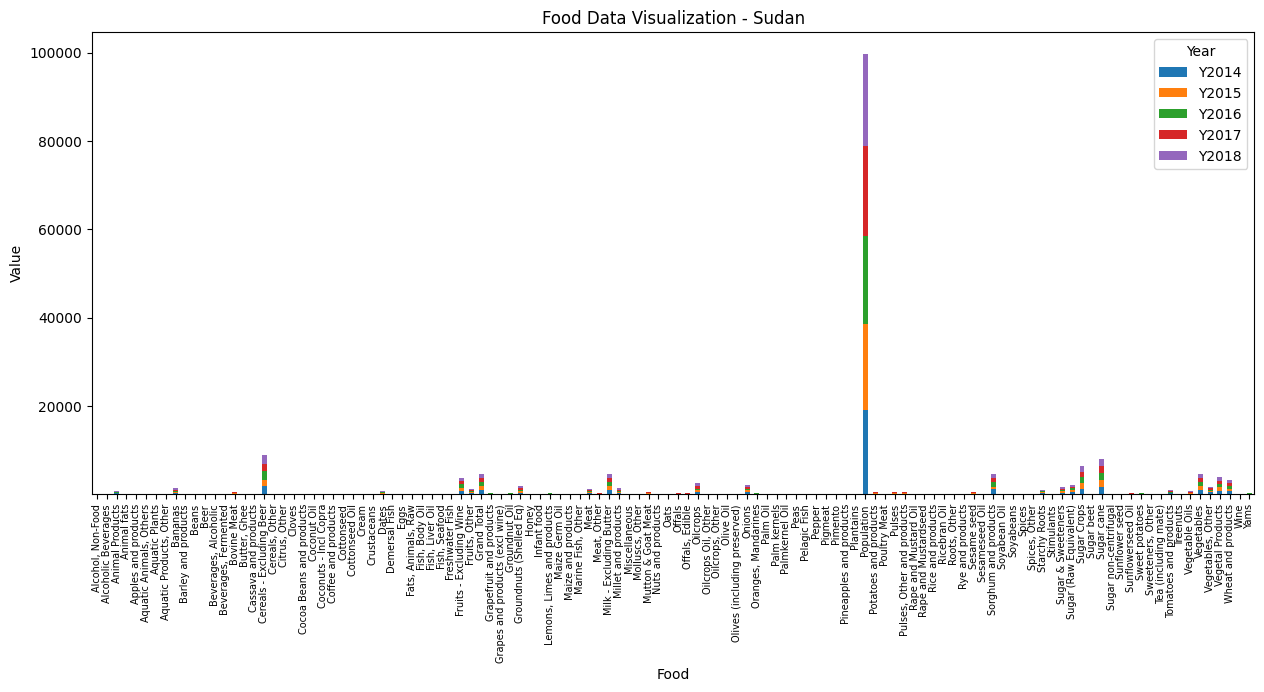

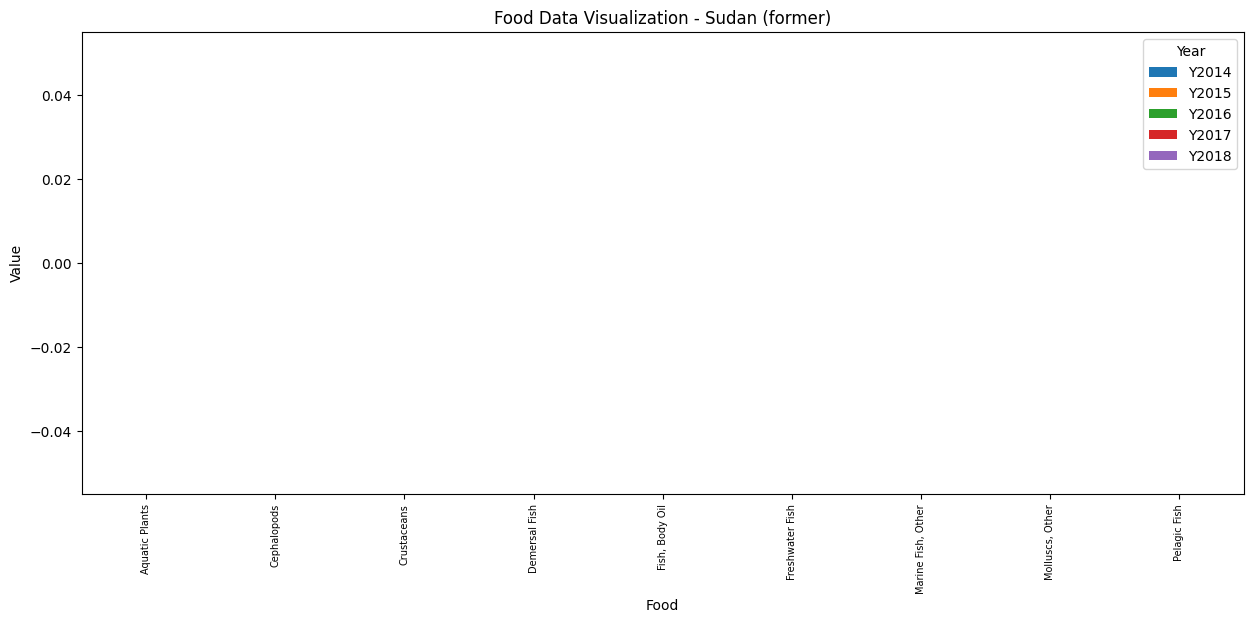

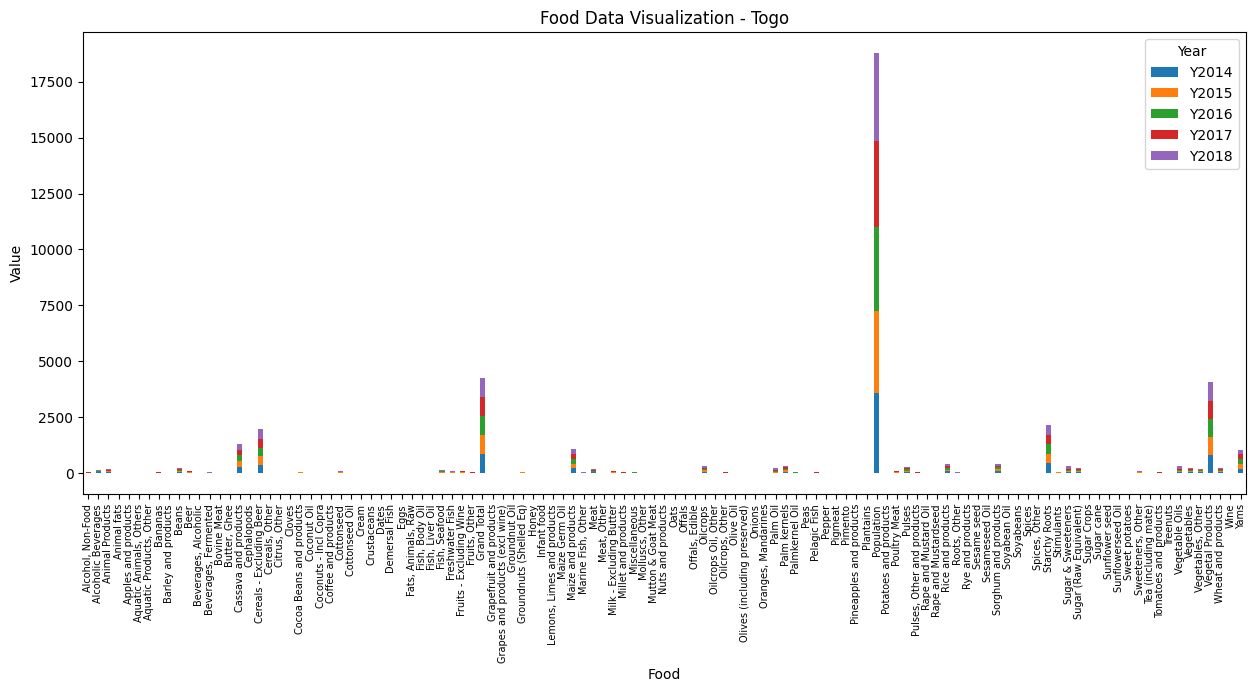

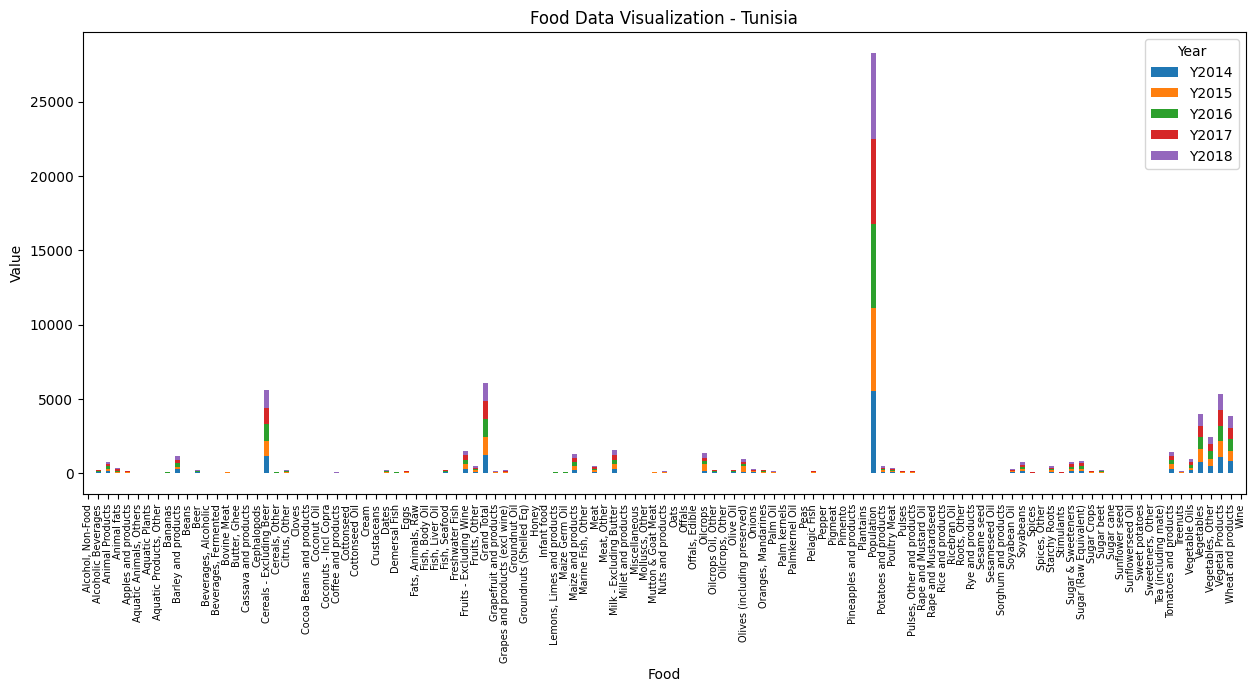

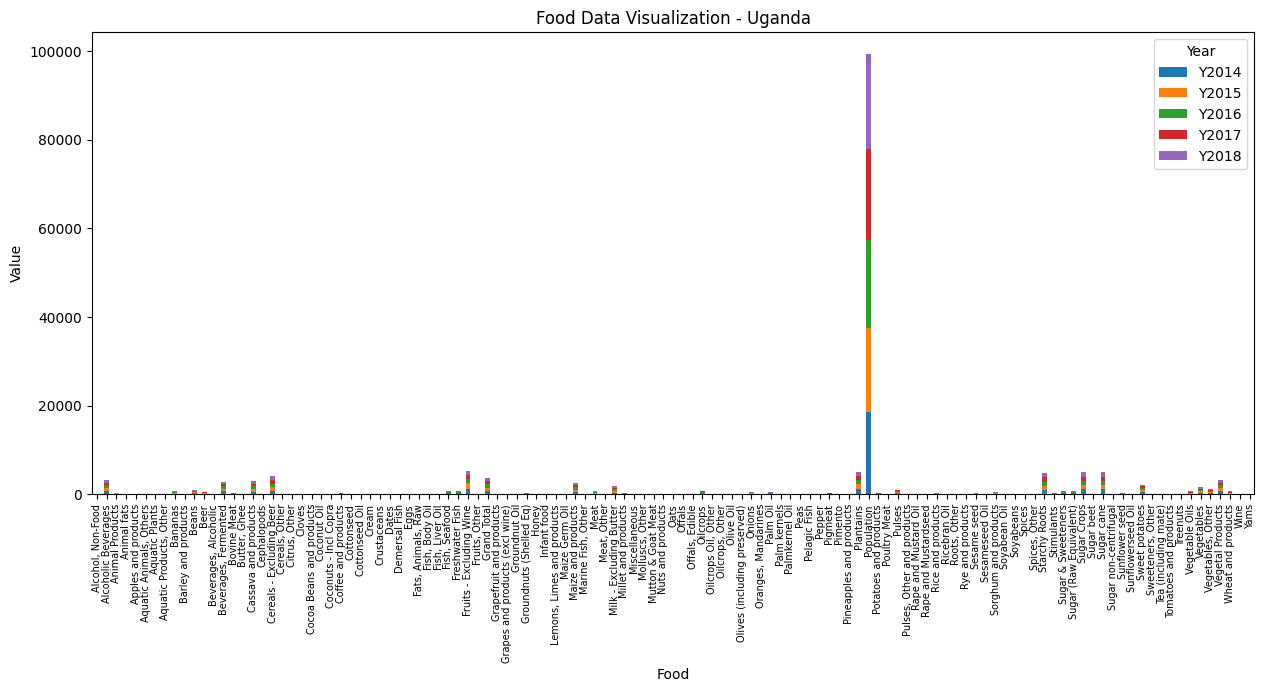

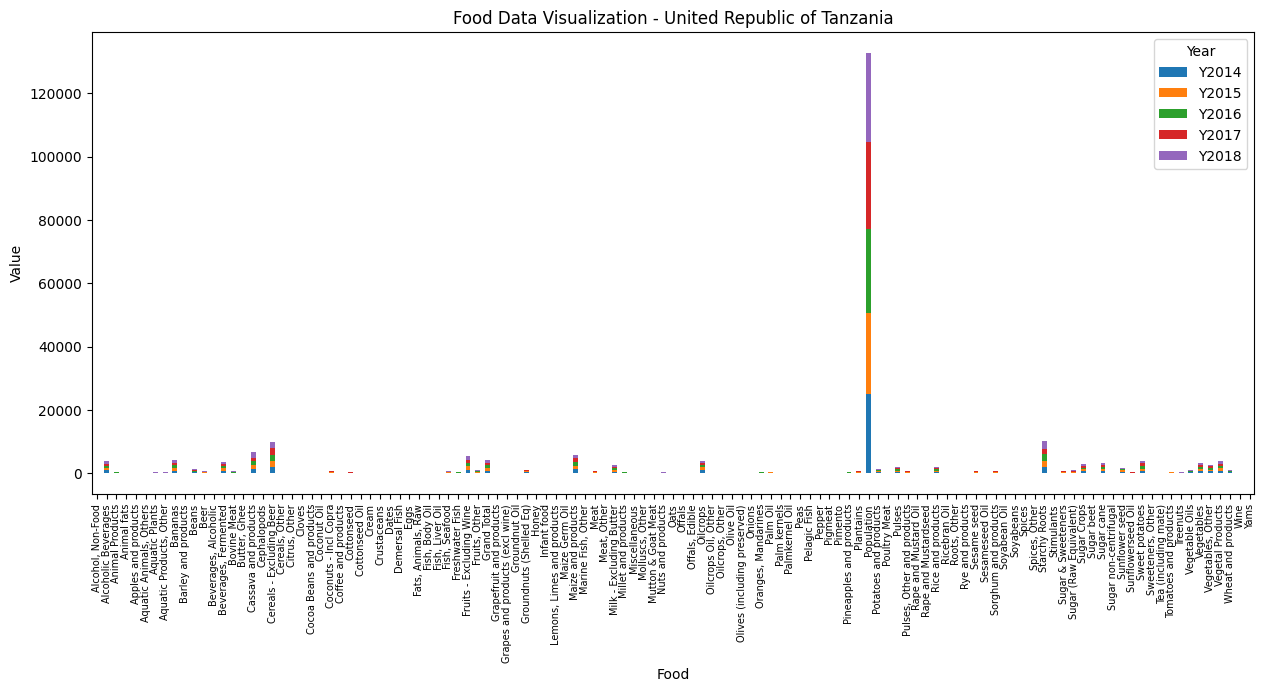

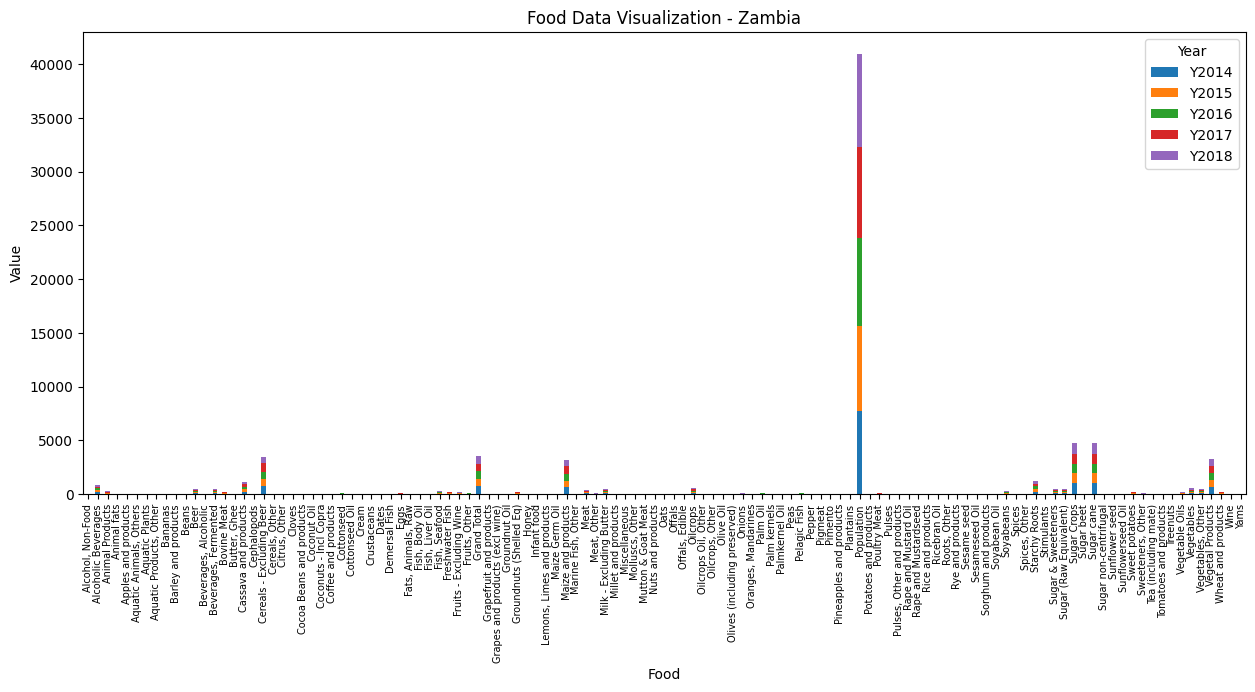

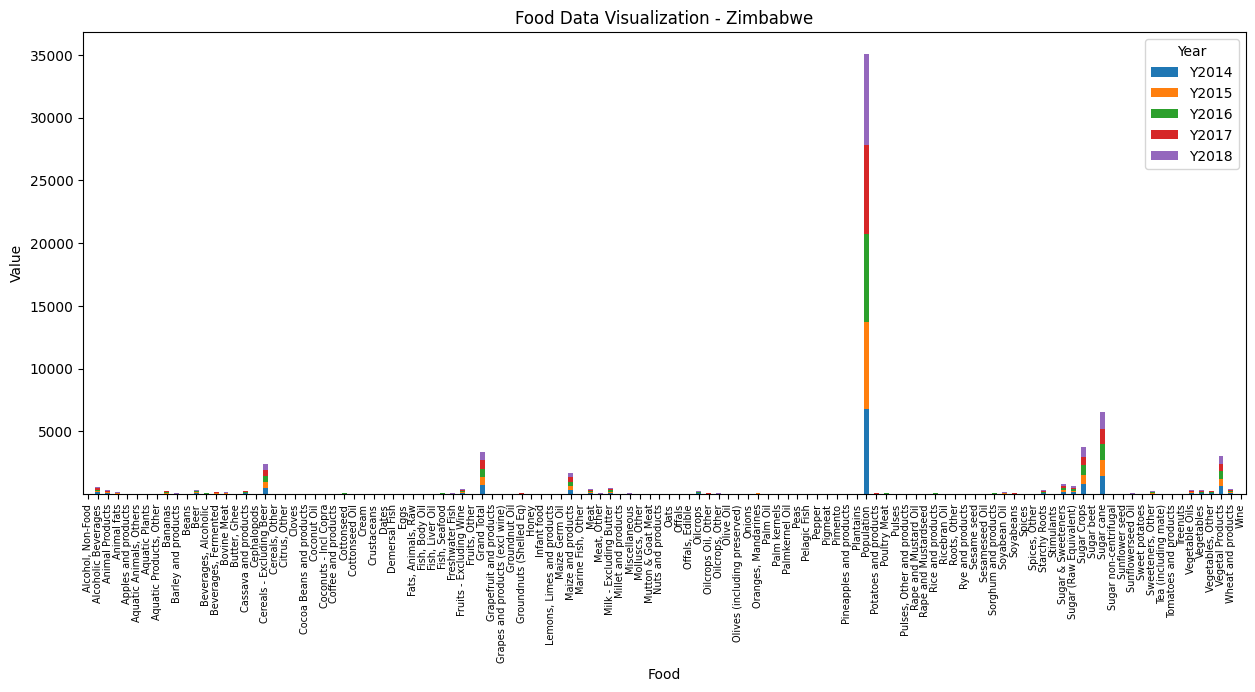

In [20]:
for country in countries:
    df_country = df_aggregated[df_aggregated['Country'] == country]
    df_country = df_country.set_index('Food')
    df_country.drop('Country', axis=1, inplace=True)
    
    df_country.plot(kind='bar', stacked=True, figsize=(15, 6))
    plt.xlabel('Food')
    plt.ylabel('Value')
    plt.title(f'Food Data Visualization - {country}')
    plt.legend(title='Year')
    plt.xticks(rotation='vertical', fontsize=7)
    plt.show()